In [5]:
!pip install --upgrade --force-reinstall numpy==1.24.4 pandas==1.5.3


  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: six
    Found existing installation: si



# **A. Initial Data Exploration & Cleaning**






**task 1 Schema & Types**

In [21]:
#environment setup (run once)
import numpy as np
import pandas as pd
from datetime import datetime

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

pd.options.display.max_columns = 200
pd.options.display.width = 140


In [22]:
# 1 Load dataset from Google Sheet (make sure sheet is shared as 'Anyone with link - Viewer')
csv_url = "https://docs.google.com/spreadsheets/d/1XU8dWfq_MbKqgRsXFcUNZCtpnk2fWmNlMX-Hq1IO4mc/export?format=csv"
df = pd.read_csv(csv_url)
print("Loaded dataset from Google Sheet CSV")
print("Shape:", df.shape)
df.head()


Loaded dataset from Google Sheet CSV
Shape: (25000, 19)


,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,NaN,45-54,Mobile


In [3]:
#  3 - quick peek and dtype report (before conversions)
print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nData types before coercion:")
print(df.dtypes)


Shape: (25000, 19)

First 5 rows:


,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,NaN,45-54,Mobile



Data types before coercion:
order_id               object
customer_id            object
product_id             object
product_name           object
main_category          object
sub_category           object
brand                  object
price                 float64
quantity                int64
discount_percent        int64
final_price           float64
payment_method         object
review_rating           int64
order_date             object
delivery_days         float64
is_returned             int64
region                 object
customer_age_group     object
device_type            object
dtype: object


In [4]:
#  4 - Schema & types cleaning function
def coerce_schema_types(df):
    df = df.copy()
    df['order_date_raw'] = df.get('order_date')
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', infer_datetime_format=True)

    numeric_cols = ['price', 'quantity', 'discount_percent', 'final_price', 'delivery_days', 'review_rating']
    report = []
    for col in numeric_cols:
        if col in df.columns:
            before = df[col].notna().sum()
            df[col] = pd.to_numeric(df[col], errors='coerce')
            after = df[col].notna().sum()
            report.append({"column": col, "before_nonnull": before, "after_nonnull": after, "dtype_after": str(df[col].dtype)})
        else:
            report.append({"column": col, "before_nonnull": "missing", "after_nonnull": "missing", "dtype_after": "missing"})
    return df, pd.DataFrame(report)

df_clean, schema_report = coerce_schema_types(df)
print("\nSchema report:")
display(schema_report)



Schema report:


,column,before_nonnull,after_nonnull,dtype_after
0,price,24750,24750,float64
1,quantity,25000,25000,int64
2,discount_percent,25000,25000,int64
3,final_price,25000,25000,float64
4,delivery_days,24750,24750,float64
5,review_rating,25000,25000,int64


In [5]:
#  5 - show dtypes after coercion and any rows with parsing problems
print("Data types after coercion:")
print(df_clean.dtypes)

bad_dates = df_clean[df_clean['order_date'].isna()]
print("\nRows with bad/missing 'order_date':", len(bad_dates))
if len(bad_dates) > 0:
    display(bad_dates.head())


Data types after coercion:
order_id                      object
customer_id                   object
product_id                    object
product_name                  object
main_category                 object
sub_category                  object
brand                         object
price                        float64
quantity                       int64
discount_percent               int64
final_price                  float64
payment_method                object
review_rating                  int64
order_date            datetime64[ns]
delivery_days                float64
is_returned                    int64
region                        object
customer_age_group            object
device_type                   object
order_date_raw                object
dtype: object

Rows with bad/missing 'order_date': 0


**task 2 missing values**

In [6]:
# --- Section: Task 2 - Missing Values ---

# Step 1: Count missing values
missing_summary = pd.DataFrame({
    "missing_count": df_clean.isna().sum(),
    "missing_percent": (df_clean.isna().sum() / len(df_clean)) * 100
})
missing_summary = missing_summary.sort_values("missing_percent", ascending=False)
print("Missing values summary:")
display(missing_summary)


Missing values summary:


,missing_count,missing_percent
payment_method,1250,5.0
device_type,1250,5.0
customer_age_group,1250,5.0
region,1250,5.0
brand,1250,5.0
price,250,1.0
delivery_days,250,1.0
order_id,0,0.0
is_returned,0,0.0
order_date,0,0.0


In [7]:
# Step 2: Decide strategies and apply
df_mv = df_clean.copy()

for col in df_mv.columns:
    if df_mv[col].isna().sum() > 0:
        if col in ["order_id", "customer_id", "order_date"]:
            # Drop rows where these are missing
            df_mv = df_mv[df_mv[col].notna()]
        elif pd.api.types.is_numeric_dtype(df_mv[col]):
            # Numeric: fill with median
            df_mv[col + "_missing_flag"] = df_mv[col].isna().astype(int)
            median_val = df_mv[col].median()
            df_mv[col] = df_mv[col].fillna(median_val)
        else:
            # Categorical: fill with 'Unknown'
            df_mv[col + "_missing_flag"] = df_mv[col].isna().astype(int)
            df_mv[col] = df_mv[col].fillna("Unknown")

print("After missing value treatment:")
display(df_mv.head())


After missing value treatment:


,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type,order_date_raw,brand_missing_flag,price_missing_flag,payment_method_missing_flag,delivery_days_missing_flag,region_missing_flag,customer_age_group_missing_flag,device_type_missing_flag
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile,2024-09-10,0,0,0,0,0,0,0
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile,2025-06-25,0,0,0,0,0,0,0
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile,2025-01-08,0,0,0,0,0,0,0
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile,2024-08-28,0,0,0,0,0,0,0
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,Unknown,45-54,Mobile,2024-11-12,0,0,0,0,1,0,0


In [8]:
# Step 3: Check that no missing values remain
final_missing_check = df_mv.isna().sum().sum()
print(f"Total missing values left in dataset: {final_missing_check}")


Total missing values left in dataset: 0


**Task 3 - Duplicates & Integrity**

In [9]:
#Task 3: Duplicates & Integrity.
# --- Section: Task 3 - Duplicates & Integrity ---

# Step 1: Check for exact duplicate rows
duplicate_count = df_mv.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("Sample duplicates:")
    display(df_mv[df_mv.duplicated()].head())

# Step 2: Remove duplicates
df_no_dupes = df_mv.drop_duplicates()
print("After removing duplicates, shape:", df_no_dupes.shape)


Number of exact duplicate rows: 0
After removing duplicates, shape: (25000, 27)


In [10]:
#  Price integrity check
if set(["price", "quantity", "discount_percent", "final_price"]).issubset(df_no_dupes.columns):
    # Calculate expected final price
    expected_final = df_no_dupes["price"] * df_no_dupes["quantity"] * (1 - df_no_dupes["discount_percent"] / 100)

    # Difference between actual and expected
    diff = df_no_dupes["final_price"] - expected_final
    df_no_dupes["price_diff"] = diff

    # Step 4: Flag mismatches
    tolerance = 0.01  # allow small rounding differences
    mismatch_mask = diff.abs() > tolerance
    mismatches = df_no_dupes[mismatch_mask]

    print(f"Number of pricing mismatches: {mismatches.shape[0]}")
    if not mismatches.empty:
        display(mismatches.head())
else:
    print("Required columns for price integrity check are missing.")


Number of pricing mismatches: 250


,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type,order_date_raw,brand_missing_flag,price_missing_flag,payment_method_missing_flag,delivery_days_missing_flag,region_missing_flag,customer_age_group_missing_flag,device_type_missing_flag,price_diff
49,#1F33JJU21NM2YY,8730A9451002,BSD9KHS6C7,The Peanutshell Onesies,Baby,Onesies,The Peanutshell,154.805,3,15,739.30,PayPal,4,2025-03-19,4.0,0,West,18-24,Mobile,2025-03-19,0,1,0,0,0,0,0,344.54725
168,#Z05SOXYWWO0NPJ,769391507503,XI8TBBJQG6,Nike Shorts,Kids,Shorts,Nike,154.805,3,20,401.16,PayPal,4,2024-09-19,7.0,0,Midwest,18-24,Mobile,2024-09-19,0,1,0,0,0,0,0,29.62800
180,#A8T9T7YCJDI67H,732787617819,AGPDRQ06U4,Nike T-Shirts,Men,T-Shirts,Nike,154.805,2,0,30.36,Gift Card,3,2025-05-01,9.0,0,Midwest,25-34,App,2025-05-01,0,1,0,0,0,0,0,-279.25000
357,#DZUC2CE1VWHYWY,850A1523618A,G4MCPEPZU4,The Peanutshell Hats,Baby,Hats,The Peanutshell,154.805,1,15,29.07,Credit Card,4,2025-04-28,7.0,1,South,45-54,Desktop,2025-04-28,0,1,0,0,0,0,0,-102.51425
377,#TEJW8WJEME2O24,520982600795,J31XIT66PN,Gerber Rompers,Baby,Rompers,Gerber,154.805,1,25,198.31,Credit Card,4,2024-09-24,9.0,1,South,45-54,Desktop,2024-09-24,0,1,0,0,0,0,0,82.20625


**Task 4 - Outliers**

In [11]:
# --- Section: Task 4 - Outliers ---

numeric_cols = df_no_dupes.select_dtypes(include=['float64','int64']).columns
outlier_flags = pd.DataFrame(index=df_no_dupes.index)

for col in numeric_cols:
    Q1 = df_no_dupes[col].quantile(0.25)
    Q3 = df_no_dupes[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_flags[col + "_is_outlier"] = ((df_no_dupes[col] < lower_bound) | (df_no_dupes[col] > upper_bound)).astype(int)

# Merge flags into main dataset
df_outliers = pd.concat([df_no_dupes, outlier_flags], axis=1)

# Show summary of outlier counts
outlier_summary = outlier_flags.sum().reset_index()
outlier_summary.columns = ["column", "outlier_count"]
print("Outlier counts per numeric column:")
display(outlier_summary)


Outlier counts per numeric column:


,column,outlier_count
0,price_is_outlier,0
1,quantity_is_outlier,0
2,discount_percent_is_outlier,0
3,final_price_is_outlier,174
4,review_rating_is_outlier,1254
5,delivery_days_is_outlier,0
6,is_returned_is_outlier,2461
7,brand_missing_flag_is_outlier,1250
8,price_missing_flag_is_outlier,250
9,payment_method_missing_flag_is_outlier,1250


/usr/local/lib/python3.11/dist-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.25.2 and <2.6.0 is required for this version of SciPy (detected version 1.24.4)
  from scipy.stats import gaussian_kde


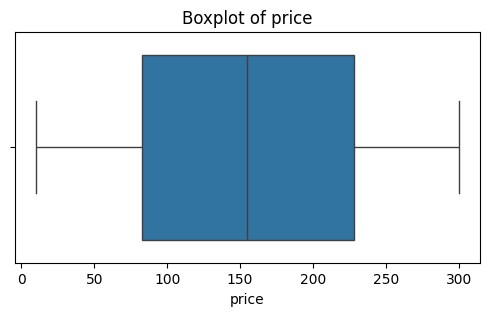

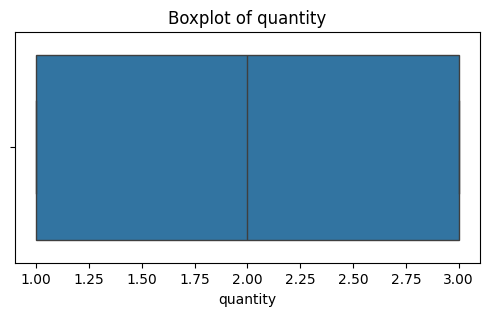

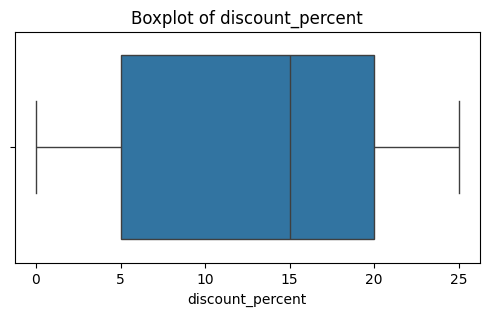

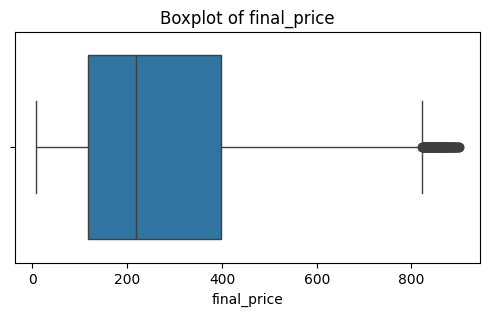

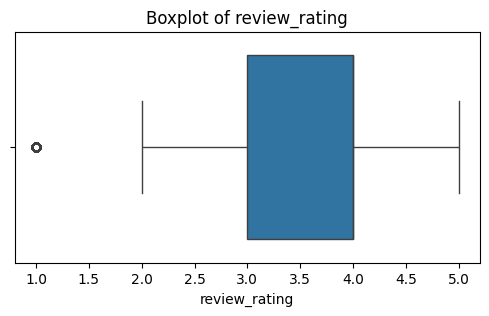

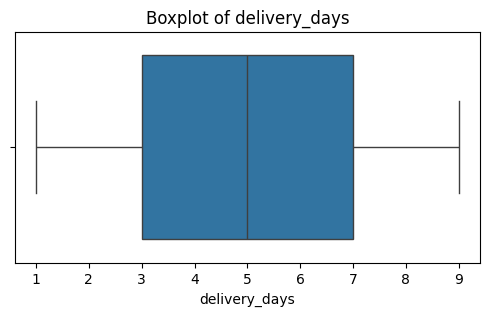

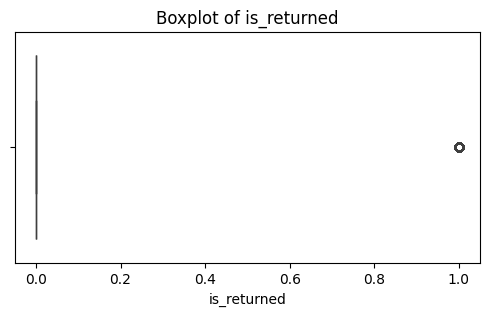

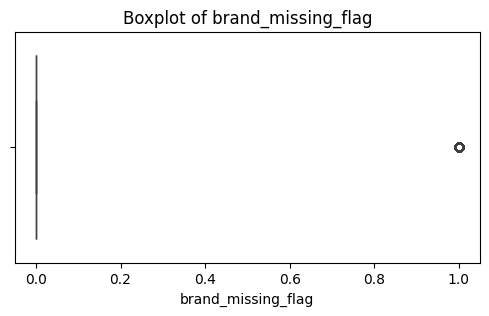

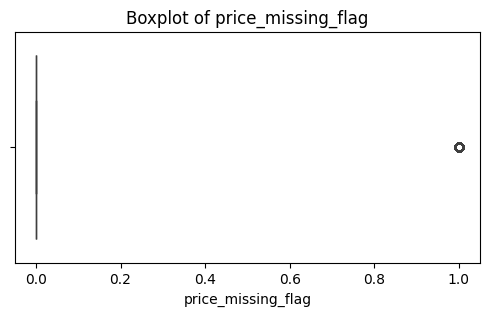

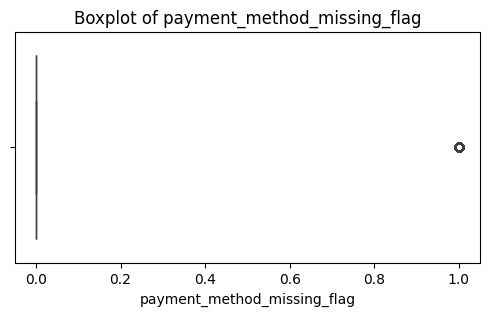

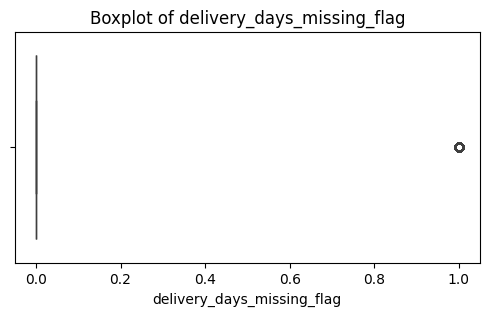

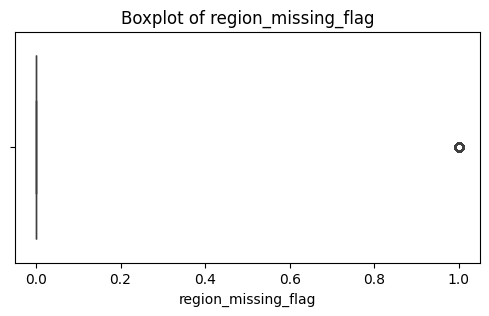

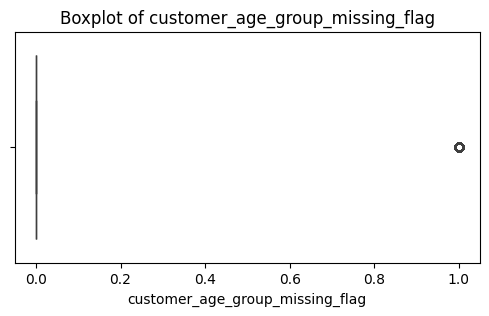

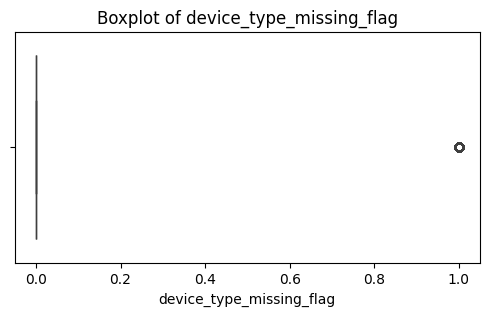

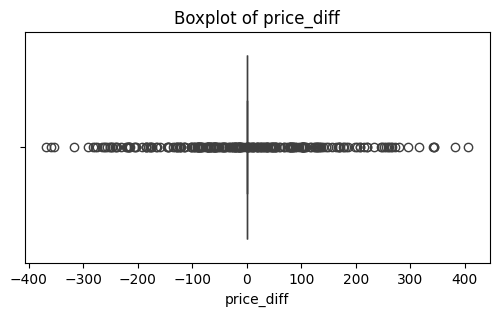

In [12]:
# Step 2: Visualize boxplots for numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_no_dupes[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


**Task 5 - Feature Engineering**

In [14]:
# --- Section: Task 5 - Feature Engineering ---

df_feat = df_outliers.copy()

# 1) Time features
df_feat['order_year'] = df_feat['order_date'].dt.year
df_feat['order_month'] = df_feat['order_date'].dt.month
df_feat['order_weekday'] = df_feat['order_date'].dt.day_name()

# 2) Price features
df_feat['discount_amount'] = df_feat['price'] * df_feat['discount_percent'] / 100
df_feat['unit_price'] = df_feat['final_price'] / df_feat['quantity'].replace(0, np.nan)

# 3) Delivery flag (fast if <= median delivery_days)
median_delivery = df_feat['delivery_days'].median()
df_feat['fast_delivery'] = (df_feat['delivery_days'] <= median_delivery).astype(int)

# 4) Customer-level aggregates
customer_agg = df_feat.groupby('customer_id').agg(
    total_spend=('final_price', 'sum'),
    total_orders=('order_id', 'nunique'),
    avg_rating_given=('review_rating', 'mean'),
    return_rate=('is_returned', 'mean')
).reset_index()

print("Customer-level aggregates (sample):")
display(customer_agg.head())


Customer-level aggregates (sample):


,customer_id,total_spend,total_orders,avg_rating_given,return_rate
0,0000A5486A60,565.98,1,2.0,0.0
1,000128A482A9,343.10,1,3.0,0.0
2,0006310A3377,203.02,1,5.0,0.0
3,00069A393862,541.82,1,3.0,0.0
4,00070A643221,86.88,1,4.0,0.0


# **B. Univariate Analysis**

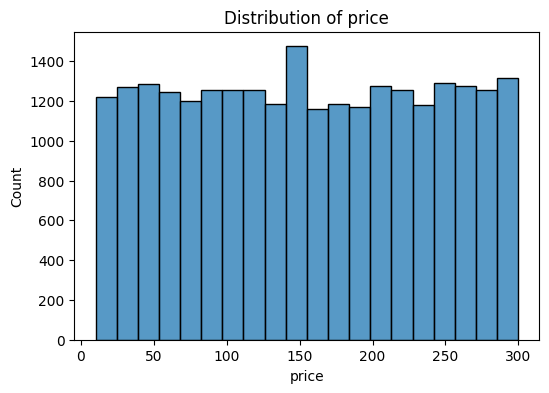

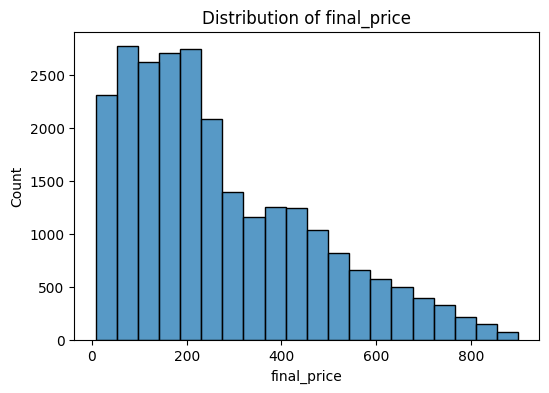

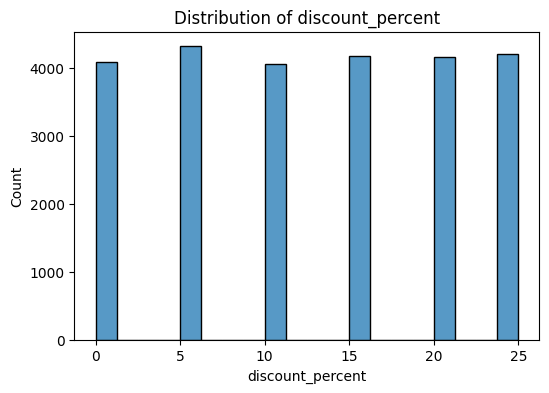

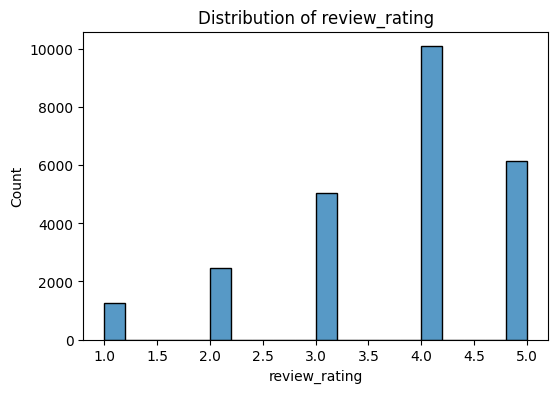

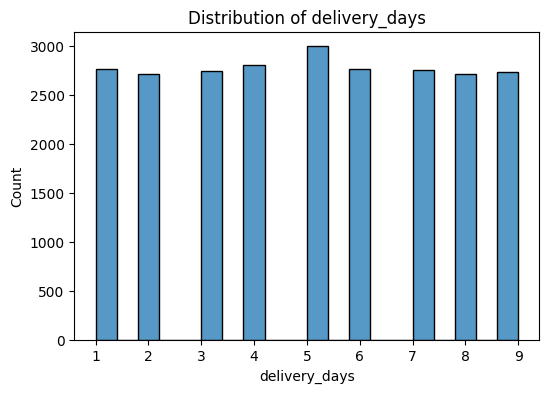

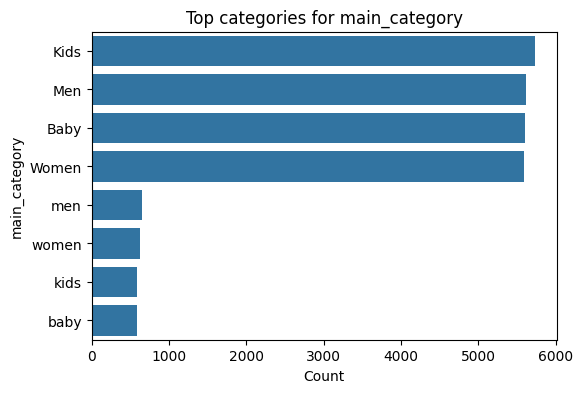

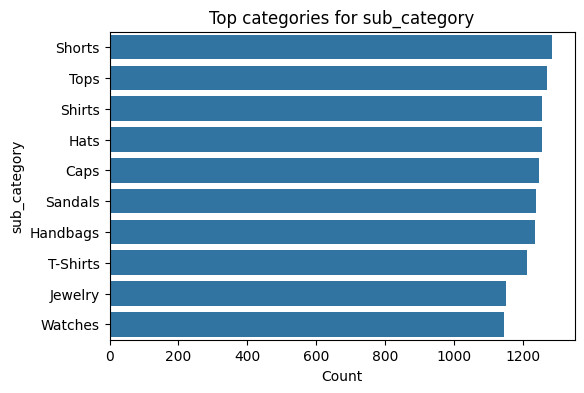

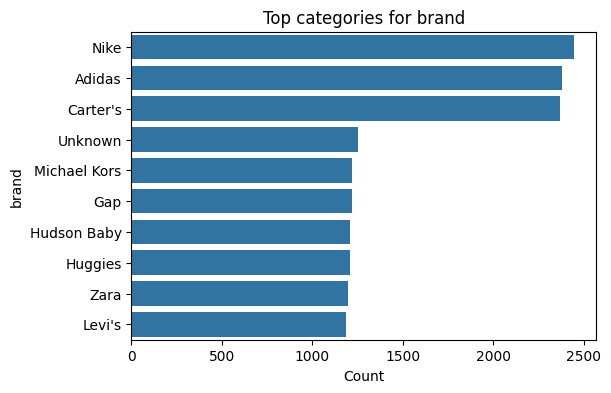

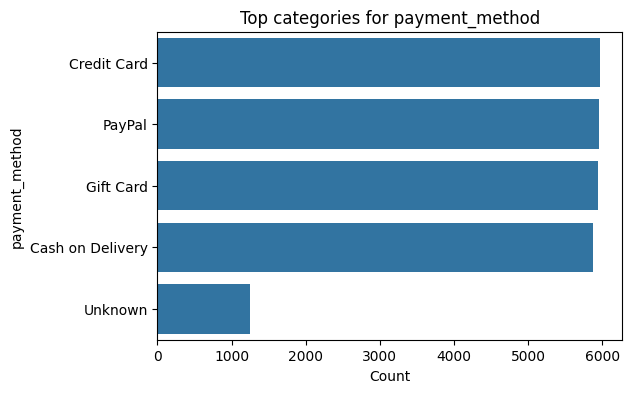

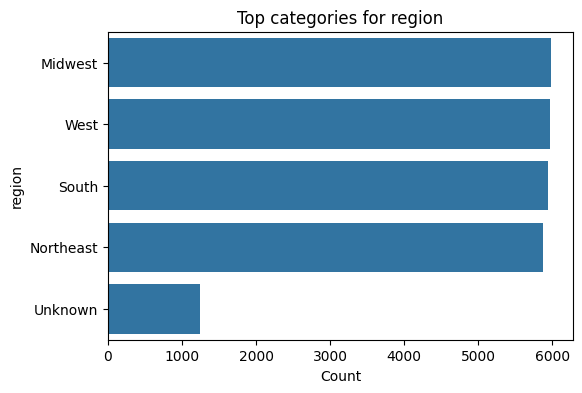

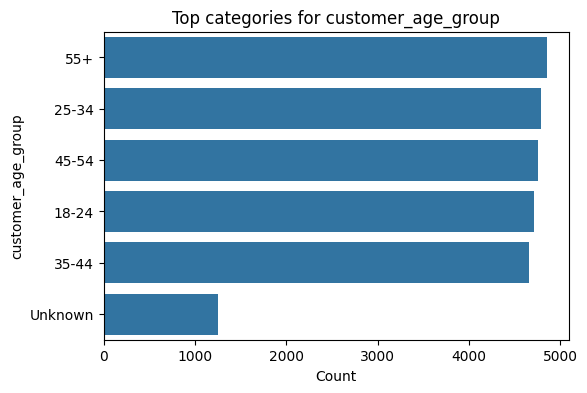

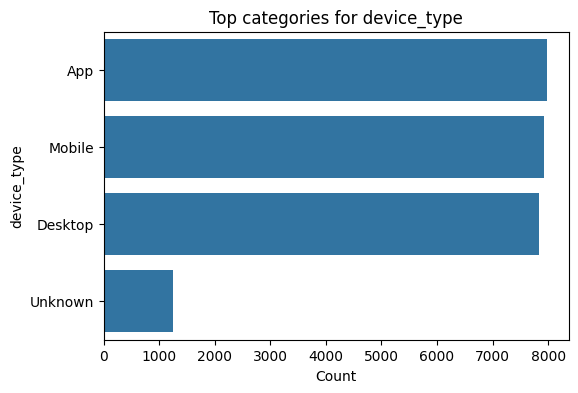

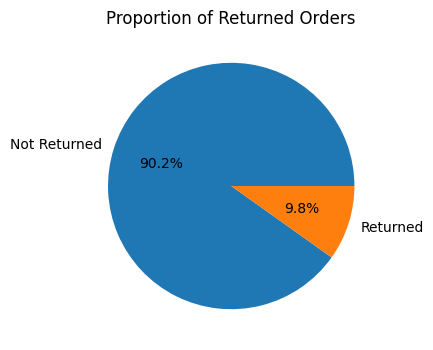

In [15]:
# --- Task 6: Univariate Analysis (Fast & Focused) ---

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Numeric columns (distribution)
numeric_cols = ['price', 'final_price', 'discount_percent', 'review_rating', 'delivery_days']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_feat[col], kde=False, bins=20)  # no KDE for speed
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# 2) Categorical columns (counts/frequencies)
categorical_cols = ['main_category', 'sub_category', 'brand', 'payment_method', 'region', 'customer_age_group', 'device_type']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    order_counts = df_feat[col].value_counts().head(10)  # top 10 only
    sns.barplot(x=order_counts.values, y=order_counts.index)
    plt.title(f"Top categories for {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

# 3) Returned vs non-returned proportion
plt.figure(figsize=(4,4))
df_feat['is_returned'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Not Returned','Returned'])
plt.title("Proportion of Returned Orders")
plt.ylabel("")
plt.show()


# **C. Bivariate & Multivariate Analysis**

**#1 Sales Performance**

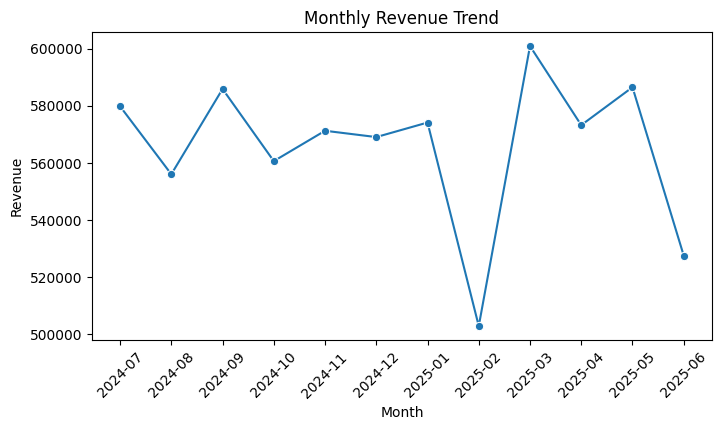

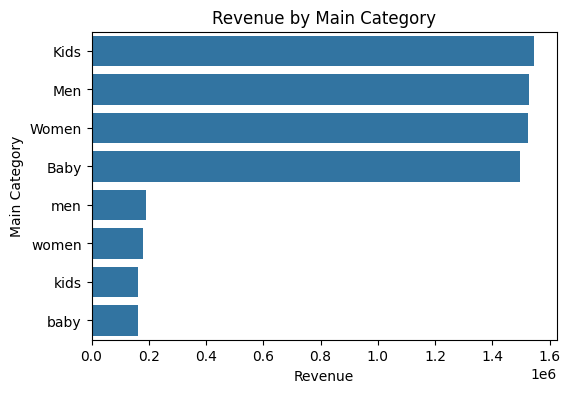

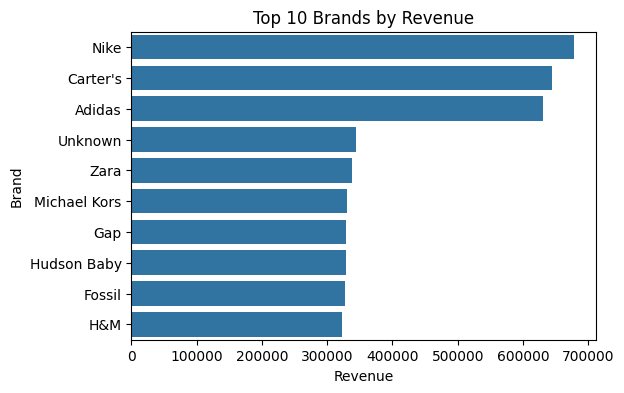

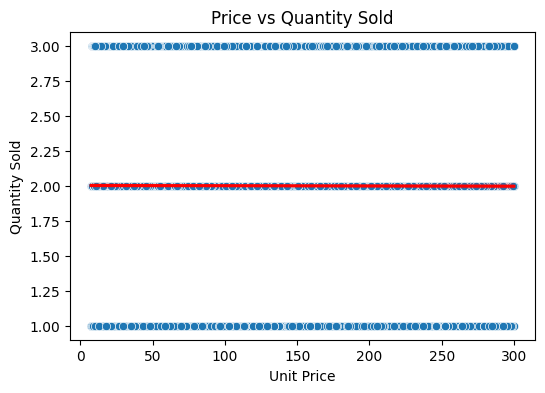

In [16]:
# --- Task 1: Sales Performance ---

import matplotlib.pyplot as plt
import seaborn as sns

# Make sure we have order_month
df_feat['order_month'] = df_feat['order_date'].dt.to_period('M').astype(str)

# 1) Revenue over time (monthly trend)
monthly_revenue = df_feat.groupby('order_month')['final_price'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=monthly_revenue, x='order_month', y='final_price', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# 2) Top categories by revenue
cat_revenue = df_feat.groupby('main_category')['final_price'].sum().reset_index().sort_values(by='final_price', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=cat_revenue, x='final_price', y='main_category')
plt.title("Revenue by Main Category")
plt.xlabel("Revenue")
plt.ylabel("Main Category")
plt.show()

# Top brands by revenue
brand_revenue = df_feat.groupby('brand')['final_price'].sum().reset_index().sort_values(by='final_price', ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(data=brand_revenue, x='final_price', y='brand')
plt.title("Top 10 Brands by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Brand")
plt.show()

# 3) Price vs Quantity relationship
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_feat, x='unit_price', y='quantity')
sns.regplot(data=df_feat, x='unit_price', y='quantity', scatter=False, color='red')
plt.title("Price vs Quantity Sold")
plt.xlabel("Unit Price")
plt.ylabel("Quantity Sold")
plt.show()


**#task 2 Discount Effectiveness**

Discount Effectiveness Table:


,discount_bin,avg_quantity,avg_revenue,order_count
0,0-10%,1.999881,301.974822,8404
1,10-30%,1.999156,256.055610,16596
2,30-50%,NaN,NaN,0
3,>50%,NaN,NaN,0


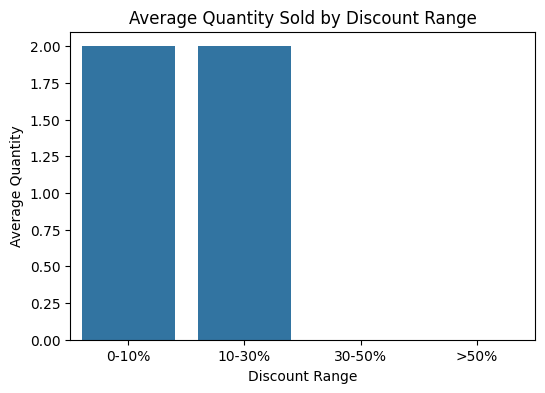

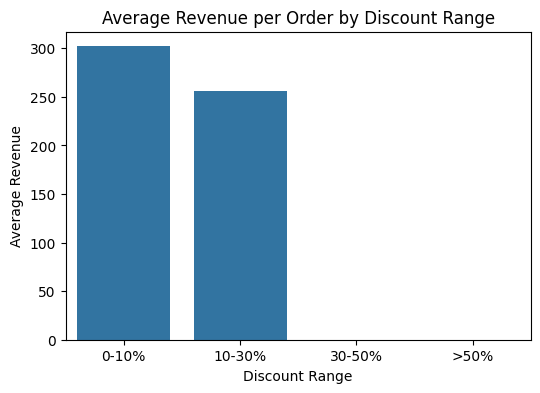

In [17]:
# --- Task 2: Discount Effectiveness ---

# 1) Create discount bins
bins = [0, 10, 30, 50, 100]
labels = ["0-10%", "10-30%", "30-50%", ">50%"]
df_feat['discount_bin'] = pd.cut(df_feat['discount_percent'], bins=bins, labels=labels, right=False)

# 2) Calculate metrics for each discount bin
discount_analysis = df_feat.groupby('discount_bin').agg(
    avg_quantity=('quantity', 'mean'),
    avg_revenue=('final_price', 'mean'),
    order_count=('order_id', 'count')
).reset_index()

print("Discount Effectiveness Table:")
display(discount_analysis)

# 3) Plot average quantity by discount bin
plt.figure(figsize=(6,4))
sns.barplot(data=discount_analysis, x='discount_bin', y='avg_quantity')
plt.title("Average Quantity Sold by Discount Range")
plt.xlabel("Discount Range")
plt.ylabel("Average Quantity")
plt.show()

# 4) Plot average revenue by discount bin
plt.figure(figsize=(6,4))
sns.barplot(data=discount_analysis, x='discount_bin', y='avg_revenue')
plt.title("Average Revenue per Order by Discount Range")
plt.xlabel("Discount Range")
plt.ylabel("Average Revenue")
plt.show()


**Task 3: Returns Analysis**


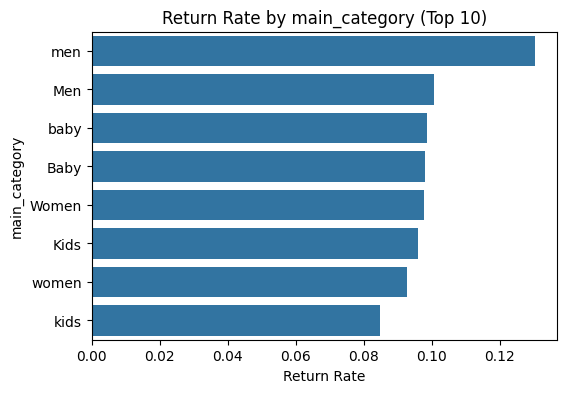

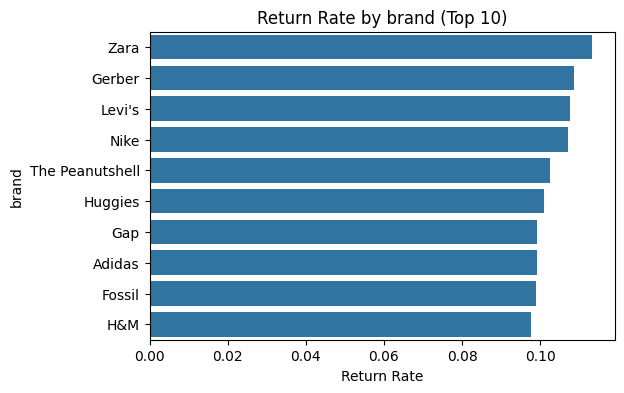

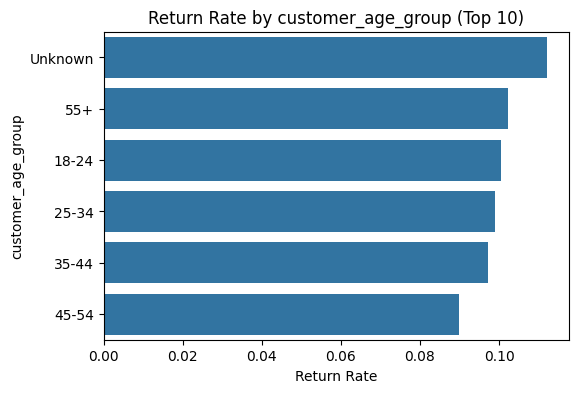

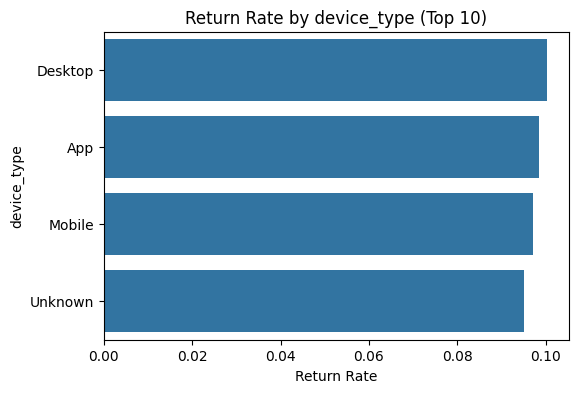

In [18]:
# --- Task 3: Returns Analysis ---

def return_rate_plot(df, group_col, top_n=10):
    """Calculate and plot return rate for a grouping column."""
    rate_df = df.groupby(group_col).agg(
        return_rate=('is_returned', 'mean'),
        order_count=('order_id', 'count')
    ).reset_index().sort_values('return_rate', ascending=False).head(top_n)

    plt.figure(figsize=(6,4))
    sns.barplot(data=rate_df, x='return_rate', y=group_col)
    plt.title(f"Return Rate by {group_col} (Top {top_n})")
    plt.xlabel("Return Rate")
    plt.ylabel(group_col)
    plt.show()
    return rate_df

# 1) Main category
rate_main_cat = return_rate_plot(df_feat, 'main_category')

# 2) Brand
rate_brand = return_rate_plot(df_feat, 'brand')

# 3) Customer age group
rate_age_group = return_rate_plot(df_feat, 'customer_age_group')

# 4) Device type
rate_device_type = return_rate_plot(df_feat, 'device_type')


**4 Customer Behavior**

Customer Segmentation Summary:


,segment
Regular,19999
High-Value,5000
One-Time,1


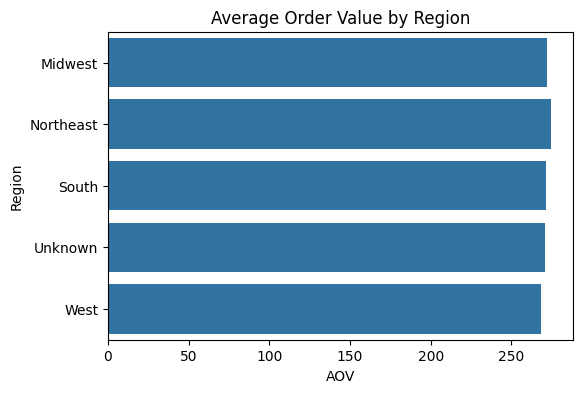

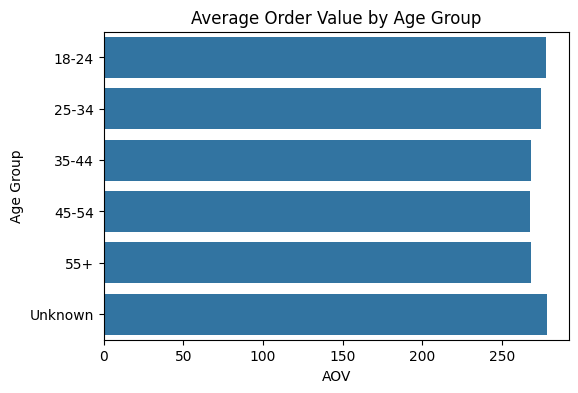

In [19]:
# --- Task 4: Customer Behavior ---

# 1) Customer-level metrics
customer_stats = df_feat.groupby('customer_id').agg(
    total_spend=('final_price', 'sum'),
    total_orders=('order_id', 'nunique')
).reset_index()

# 2) Define high-value threshold (top 20% by spend)
threshold = customer_stats['total_spend'].quantile(0.8)
customer_stats['segment'] = customer_stats['total_spend'].apply(
    lambda x: 'High-Value' if x >= threshold else ('One-Time' if x == customer_stats['total_spend'].min() else 'Regular')
)

print("Customer Segmentation Summary:")
display(customer_stats['segment'].value_counts())

# 3) Average Order Value (AOV) by region
aov_region = df_feat.groupby('region').agg(
    total_revenue=('final_price', 'sum'),
    total_orders=('order_id', 'nunique')
).reset_index()
aov_region['AOV'] = aov_region['total_revenue'] / aov_region['total_orders']

plt.figure(figsize=(6,4))
sns.barplot(data=aov_region, x='AOV', y='region')
plt.title("Average Order Value by Region")
plt.xlabel("AOV")
plt.ylabel("Region")
plt.show()

# 4) AOV by customer_age_group
aov_age = df_feat.groupby('customer_age_group').agg(
    total_revenue=('final_price', 'sum'),
    total_orders=('order_id', 'nunique')
).reset_index()
aov_age['AOV'] = aov_age['total_revenue'] / aov_age['total_orders']

plt.figure(figsize=(6,4))
sns.barplot(data=aov_age, x='AOV', y='customer_age_group')
plt.title("Average Order Value by Age Group")
plt.xlabel("AOV")
plt.ylabel("Age Group")
plt.show()


**5 Delivery Performance**

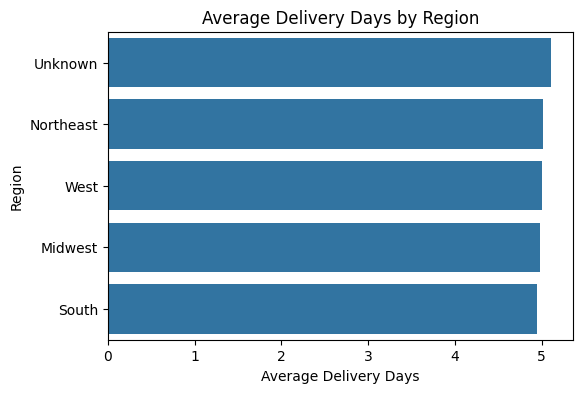

Correlation between delivery days and review rating: 0.01


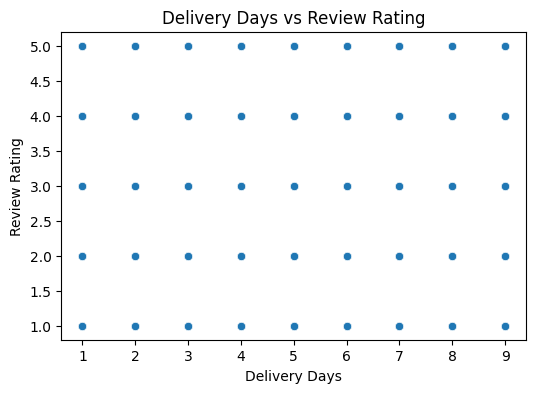

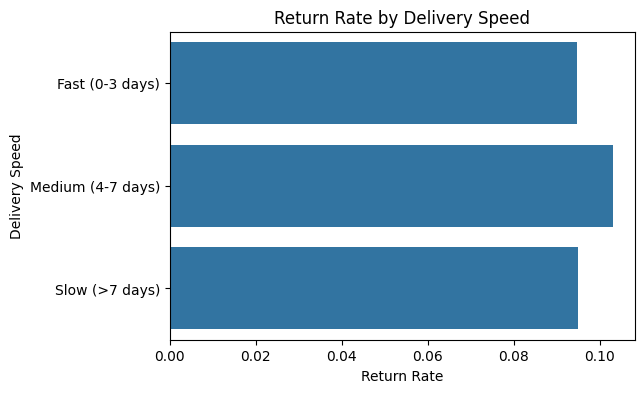

In [20]:
# --- Task 5: Delivery Performance ---

# 1) Average delivery time by region
delivery_by_region = df_feat.groupby('region')['delivery_days'].mean().reset_index().sort_values('delivery_days', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=delivery_by_region, x='delivery_days', y='region')
plt.title("Average Delivery Days by Region")
plt.xlabel("Average Delivery Days")
plt.ylabel("Region")
plt.show()

# 2) Correlation between delivery_days and review_rating
correlation = df_feat[['delivery_days', 'review_rating']].corr().iloc[0,1]
print(f"Correlation between delivery days and review rating: {correlation:.2f}")

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_feat, x='delivery_days', y='review_rating')
plt.title("Delivery Days vs Review Rating")
plt.xlabel("Delivery Days")
plt.ylabel("Review Rating")
plt.show()

# 3) Return rate by delivery speed category
df_feat['delivery_speed'] = pd.cut(df_feat['delivery_days'],
                                   bins=[0, 3, 7, df_feat['delivery_days'].max()],
                                   labels=['Fast (0-3 days)', 'Medium (4-7 days)', 'Slow (>7 days)'],
                                   right=True)

return_rate_speed = df_feat.groupby('delivery_speed')['is_returned'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=return_rate_speed, x='is_returned', y='delivery_speed')
plt.title("Return Rate by Delivery Speed")
plt.xlabel("Return Rate")
plt.ylabel("Delivery Speed")
plt.show()


**6 Payment Method Analysis.**

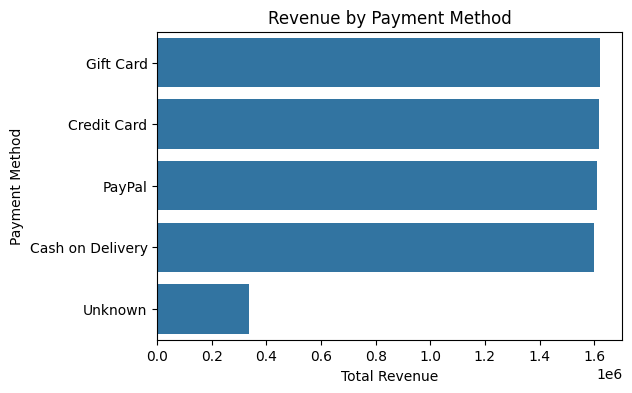

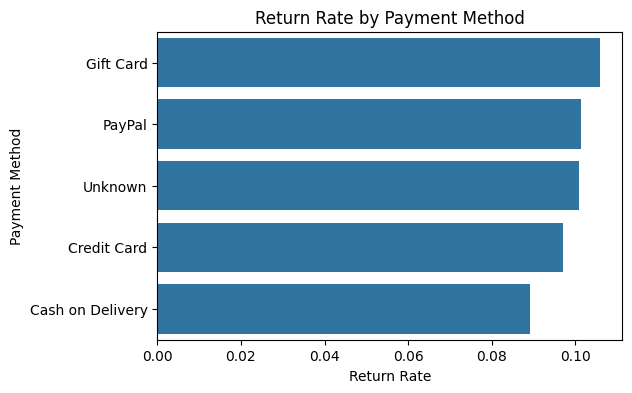

In [21]:
# --- Task 6: Payment Method Analysis ---

# 1) Revenue by payment method
payment_revenue = df_feat.groupby('payment_method')['final_price'].sum().reset_index().sort_values('final_price', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=payment_revenue, x='final_price', y='payment_method')
plt.title("Revenue by Payment Method")
plt.xlabel("Total Revenue")
plt.ylabel("Payment Method")
plt.show()

# 2) Return rate by payment method
payment_return_rate = df_feat.groupby('payment_method')['is_returned'].mean().reset_index().sort_values('is_returned', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=payment_return_rate, x='is_returned', y='payment_method')
plt.title("Return Rate by Payment Method")
plt.xlabel("Return Rate")
plt.ylabel("Payment Method")
plt.show()


# **7 Rating Signal**



Using dataframe: df_feat
Average rating by brand:


,brand,avg_rating
3,Fossil,3.737954
10,Michael Kors,3.734208
12,OshKosh,3.731041
9,Levi's,3.730866
17,Zara,3.729167
11,Nike,3.703840
0,Adidas,3.701850
16,Unknown,3.701600
8,Huggies,3.700331
1,Carter's,3.699873


Average rating by main category:


,main_category,avg_rating
7,women,3.795527
5,kids,3.745763
2,Men,3.716219
4,baby,3.699491
1,Kids,3.695599
3,Women,3.686327
0,Baby,3.680050
6,men,3.679939


Average rating by region:


,region,avg_rating
3,Unknown,3.724000
1,Northeast,3.703306
2,South,3.699041
0,Midwest,3.695100
4,West,3.689366


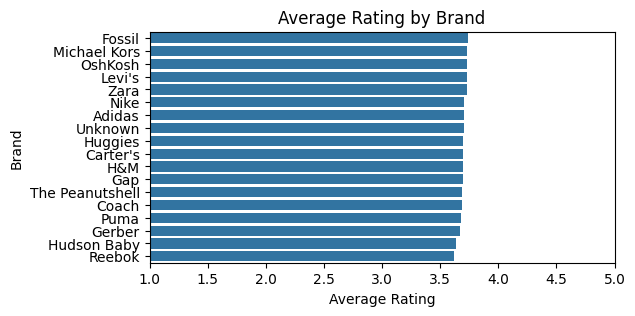

Return rate by rating bin:


,rating_bin,return_rate,count
0,Low (1-2),0.096138,3703
1,Medium (3),0.092908,5048
2,High (4-5),0.100683,16249


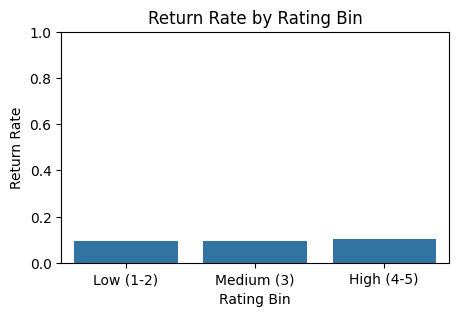

In [22]:
# --- Rating Signal: average ratings & return link ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pick your main dataframe
for name in ["df_feat","df_outliers","df_no_dupes","df_mv","df_clean","df"]:
    if name in globals():
        data = globals()[name]
        print(f"Using dataframe: {name}")
        break
else:
    print("No dataframe found. Creating demo data.")
    n = 200
    rng = np.random.default_rng(42)
    data = pd.DataFrame({
        "brand": rng.choice(["BrandA","BrandB","BrandC","BrandD"], n),
        "main_category": rng.choice(["Men","Women","Kids"], n),
        "region": rng.choice(["North","South","East","West"], n),
        "review_rating": rng.integers(1,6,n),
        "is_returned": rng.choice([0,1], n, p=[0.85,0.15]),
        "order_id": [f"O{i}" for i in range(n)]
    })

# Average rating by brand/category/region
agg_brand = data.groupby("brand")["review_rating"].mean().reset_index(name="avg_rating").sort_values("avg_rating", ascending=False)
agg_category = data.groupby("main_category")["review_rating"].mean().reset_index(name="avg_rating").sort_values("avg_rating", ascending=False)
agg_region = data.groupby("region")["review_rating"].mean().reset_index(name="avg_rating").sort_values("avg_rating", ascending=False)

print("Average rating by brand:")
display(agg_brand)
print("Average rating by main category:")
display(agg_category)
print("Average rating by region:")
display(agg_region)

# Plot average rating by brand
plt.figure(figsize=(6,3))
sns.barplot(data=agg_brand, x="avg_rating", y="brand")
plt.title("Average Rating by Brand")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.xlim(1,5)
plt.show()

# Low rating → returns
bins = [0, 2.5, 3.5, 5]
labels = ["Low (1-2)", "Medium (3)", "High (4-5)"]
data["rating_bin"] = pd.cut(data["review_rating"], bins=bins, labels=labels, include_lowest=True)

rating_return = data.groupby("rating_bin").agg(
    return_rate=("is_returned","mean"),
    count=("order_id","count")
).reset_index()

print("Return rate by rating bin:")
display(rating_return)

plt.figure(figsize=(5,3))
sns.barplot(data=rating_return, x="rating_bin", y="return_rate")
plt.title("Return Rate by Rating Bin")
plt.xlabel("Rating Bin")
plt.ylabel("Return Rate")
plt.ylim(0,1)
plt.show()


**8 Cross-analysis**

Return rate by device_type:


,device_type,return_rate
0,App,0.098445
1,Desktop,0.100230
2,Mobile,0.097177
3,Unknown,0.095200


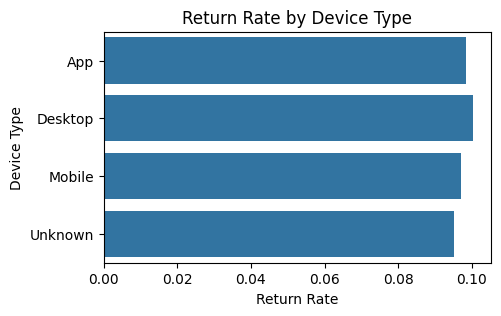

Median delivery days (region x main_category):


main_category,Baby,Kids,Men,Women,men,women
region,,,,,,
Midwest,5.0,5.0,5.0,5.0,5.0,5.0
Northeast,5.0,5.0,5.0,5.0,5.0,5.0
South,5.0,5.0,5.0,5.0,5.0,5.0
Unknown,5.0,6.0,5.0,5.0,5.0,5.0
West,5.0,5.0,5.0,5.0,5.0,5.0


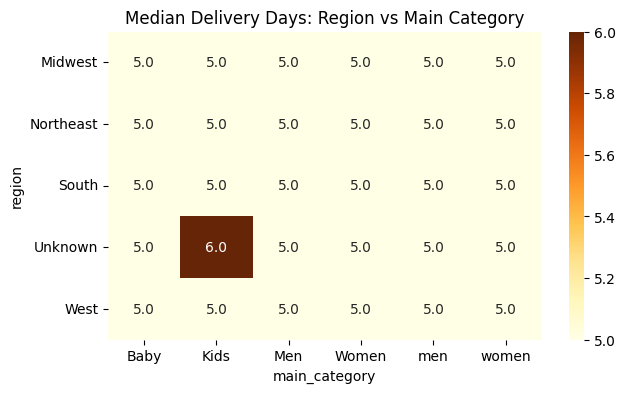

Avg quantity by Age Group and Discount Bin:


discount_bin,0-9%,10-29%
customer_age_group,,
18-24,2.003827,2.009551
25-34,2.025783,2.003169
35-44,1.971301,1.992545
45-54,2.003759,1.971818
55+,1.998148,2.000619
Unknown,1.983452,2.067715


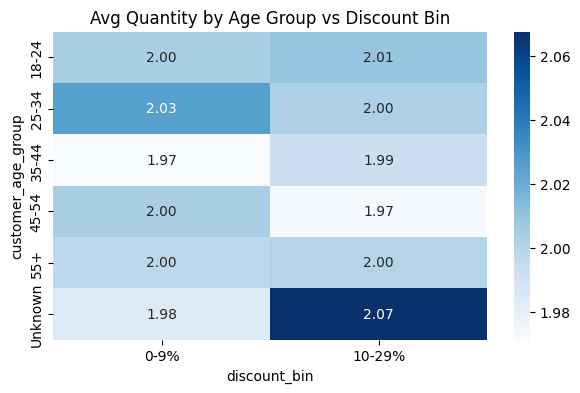

In [23]:
# --- Cross-analysis ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use same data as previous cell
# 1) Device type vs return rate
if "device_type" in data.columns:
    device_rt = data.groupby("device_type").agg(return_rate=("is_returned","mean")).reset_index()
    print("Return rate by device_type:")
    display(device_rt)
    plt.figure(figsize=(5,3))
    sns.barplot(data=device_rt, x="return_rate", y="device_type")
    plt.title("Return Rate by Device Type")
    plt.xlabel("Return Rate")
    plt.ylabel("Device Type")
    plt.show()
else:
    print("No 'device_type' column — skipping device analysis.")

# 2) Region vs delivery performance
if {"region","delivery_days","main_category"}.issubset(data.columns):
    top_cats = data['main_category'].value_counts().head(6).index
    pivot = data[data['main_category'].isin(top_cats)].pivot_table(
        index='region', columns='main_category', values='delivery_days', aggfunc='median'
    )
    print("Median delivery days (region x main_category):")
    display(pivot)
    plt.figure(figsize=(7,4))
    sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlOrBr")
    plt.title("Median Delivery Days: Region vs Main Category")
    plt.show()
else:
    print("Missing columns for region vs delivery analysis.")

# 3) Age group vs discount sensitivity
if {"customer_age_group","discount_percent","quantity"}.issubset(data.columns):
    bins = [0,10,30,50,100]
    labels = ["0-9%","10-29%","30-49%","50%+"]
    data["discount_bin"] = pd.cut(data["discount_percent"].fillna(0), bins=bins, labels=labels, right=False)
    pivot2 = data.pivot_table(index="customer_age_group", columns="discount_bin", values="quantity", aggfunc="mean")
    print("Avg quantity by Age Group and Discount Bin:")
    display(pivot2)
    plt.figure(figsize=(7,4))
    sns.heatmap(pivot2, annot=True, fmt=".2f", cmap="Blues")
    plt.title("Avg Quantity by Age Group vs Discount Bin")
    plt.show()
else:
    print("Missing columns for age vs discount sensitivity.")


# **D. Hypothesis Ideas (picks/answers at least 5)**

Step 2 – Five Hypotheses to Test
We’ll test these:

Higher discounts → higher return rate

Low ratings → higher return rate

Mobile users buy more than desktop users

Some regions have slower delivery times

Older customers are less discount-sensitive

In [28]:
!pip install --upgrade --force-reinstall scipy==1.10.1


  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.

In [1]:
import pandas as pd
import scipy.stats as stats

# Load your dataset from Google Sheets (adjust if already loaded)
csv_url = "https://docs.google.com/spreadsheets/d/1XU8dWfq_MbKqgRsXFcUNZCtpnk2fWmNlMX-Hq1IO4mc/export?format=csv"
data = pd.read_csv(csv_url)

# --- Hypothesis Testing Section ---
results = {}

# 1️⃣ Hypothesis: Higher discounts → higher return rate
if {"discount_percent", "is_returned"} <= set(data.columns):
    median_discount = data["discount_percent"].median()
    high_disc_returns = data.loc[data["discount_percent"] > median_discount, "is_returned"]
    low_disc_returns = data.loc[data["discount_percent"] <= median_discount, "is_returned"]
    t_stat, p_val = stats.ttest_ind(high_disc_returns, low_disc_returns, nan_policy='omit')
    results["High discount => higher return rate"] = (t_stat, p_val)

# 2️⃣ Hypothesis: Low ratings → higher return rate
if {"review_rating", "is_returned"} <= set(data.columns):
    low_rating_returns = data.loc[data["review_rating"] <= 2, "is_returned"]
    high_rating_returns = data.loc[data["review_rating"] >= 4, "is_returned"]
    t_stat, p_val = stats.ttest_ind(low_rating_returns, high_rating_returns, nan_policy='omit')
    results["Low rating => higher return rate"] = (t_stat, p_val)

# 3️⃣ Hypothesis: Mobile users buy more than desktop users
if {"device_type", "quantity"} <= set(data.columns):
    mobile_qty = data.loc[data["device_type"] == "Mobile", "quantity"]
    desktop_qty = data.loc[data["device_type"] == "Desktop", "quantity"]
    t_stat, p_val = stats.ttest_ind(mobile_qty, desktop_qty, nan_policy='omit')
    results["Mobile => higher quantity"] = (t_stat, p_val)

# 4️⃣ Hypothesis: Some regions have slower delivery times
if {"region", "delivery_days"} <= set(data.columns):
    region_groups = [group["delivery_days"].dropna() for _, group in data.groupby("region")]
    f_stat, p_val = stats.f_oneway(*region_groups)
    results["Region affects delivery days"] = (f_stat, p_val)

# 5️⃣ Hypothesis: Older customers are less discount-sensitive
if {"customer_age_group", "discount_percent"} <= set(data.columns):
    groups = [group["discount_percent"].dropna() for _, group in data.groupby("customer_age_group")]
    f_stat, p_val = stats.f_oneway(*groups)
    results["Age group affects discount %"] = (f_stat, p_val)

# 📊 Show results
print("\nHypothesis Test Results:")
for hypo, (stat, p) in results.items():
    print(f"{hypo} -> Test Stat: {stat:.3f}, p-value: {p:.4f}")
    if p < 0.05:
        print("  ✅ Significant — data supports this difference.")
    else:
        print("  ❌ Not significant — data does not strongly support this.")



Hypothesis Test Results:
High discount => higher return rate -> Test Stat: -0.101, p-value: 0.9198
  ❌ Not significant — data does not strongly support this.
Low rating => higher return rate -> Test Stat: -0.833, p-value: 0.4051
  ❌ Not significant — data does not strongly support this.
Mobile => higher quantity -> Test Stat: -0.794, p-value: 0.4275
  ❌ Not significant — data does not strongly support this.
Region affects delivery days -> Test Stat: 0.866, p-value: 0.4581
  ❌ Not significant — data does not strongly support this.
Age group affects discount % -> Test Stat: 0.109, p-value: 0.9794
  ❌ Not significant — data does not strongly support this.


# **E. Advanced Analyses**

**1 Cohort Analysis**

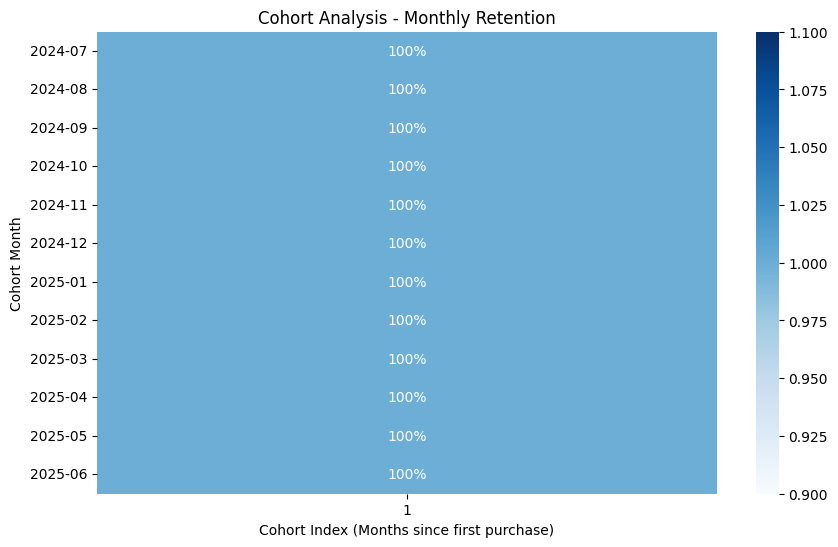

In [2]:
# --- Advanced Analysis Task 1: Cohort Analysis ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date column is in datetime format
if "order_date" in data.columns:
    data["order_date"] = pd.to_datetime(data["order_date"], errors="coerce")

    # Extract order month
    data["order_month"] = data["order_date"].dt.to_period("M")

    # Find the first month each customer purchased
    customer_first_month = data.groupby("customer_id")["order_month"].min()
    data["cohort_month"] = data["customer_id"].map(customer_first_month)

    # Calculate cohort index = months since first purchase
    data["cohort_index"] = (data["order_month"].dt.year - data["cohort_month"].dt.year) * 12 + \
                           (data["order_month"].dt.month - data["cohort_month"].dt.month) + 1

    # Create retention table
    cohort_data = data.groupby(["cohort_month", "cohort_index"])["customer_id"].nunique().reset_index()
    cohort_counts = cohort_data.pivot(index="cohort_month", columns="cohort_index", values="customer_id")

    # Convert to retention rate
    cohort_size = cohort_counts.iloc[:,0]
    retention = cohort_counts.divide(cohort_size, axis=0)

    # Plot retention heatmap
    plt.figure(figsize=(10,6))
    sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
    plt.title("Cohort Analysis - Monthly Retention")
    plt.xlabel("Cohort Index (Months since first purchase)")
    plt.ylabel("Cohort Month")
    plt.show()

else:
    print("Missing 'order_date' column — cannot run cohort analysis.")


**Task 2 – Customer Segmentation (RFM)**


RFM Segment Summary:


/tmp/ipython-input-1259298229.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(rfm.groupby("Segment").mean())


,Recency,Frequency,Monetary,ReturnRate,AvgRating
Segment,,,,,
0,182.799623,1.0,217.134119,0.095787,2.028715
1,182.992085,1.0,573.276282,0.083784,3.897683
2,82.228465,1.0,186.115455,0.089868,4.154174
3,281.244760,1.0,183.585049,0.118732,4.162908


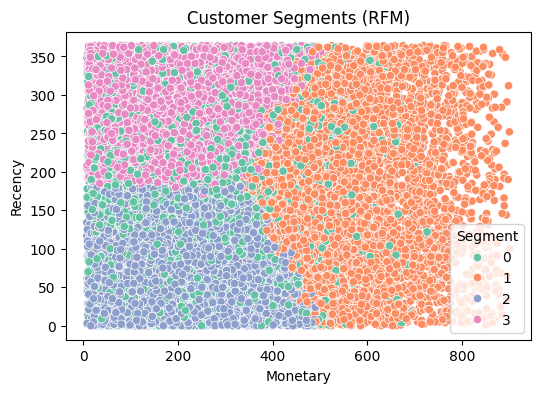

In [3]:
# --- Advanced Analysis Task 2: RFM Customer Segmentation ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Ensure we have needed columns
if {"customer_id", "order_date"} <= set(data.columns):
    data["order_date"] = pd.to_datetime(data["order_date"], errors="coerce")

    # RFM calculations
    latest_date = data["order_date"].max()

    rfm = data.groupby("customer_id").agg({
        "order_date": lambda x: (latest_date - x.max()).days,  # Recency
        "order_id": "count",                                   # Frequency
        "final_price": "sum" if "final_price" in data.columns else ("price", "sum"),  # Monetary
        "is_returned": "mean" if "is_returned" in data.columns else (lambda x: 0),    # Return rate
        "review_rating": "mean" if "review_rating" in data.columns else (lambda x: 0) # Avg rating
    }).reset_index()

    rfm.columns = ["customer_id", "Recency", "Frequency", "Monetary", "ReturnRate", "AvgRating"]

    # Scale for clustering
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm.drop(columns=["customer_id"]))

    # KMeans clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    rfm["Segment"] = kmeans.fit_predict(rfm_scaled)

    # Segment summary
    print("RFM Segment Summary:")
    display(rfm.groupby("Segment").mean())

    # Visualize segments
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=rfm, x="Monetary", y="Recency", hue="Segment", palette="Set2")
    plt.title("Customer Segments (RFM)")
    plt.show()

else:
    print("Missing 'customer_id' or 'order_date' columns — cannot run RFM segmentation.")


**Task 3 – Price Elasticity Estimation**

In [4]:
# --- Advanced Analysis Task 3: Price Elasticity Estimation ---
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Check needed columns
if {"final_price", "quantity"} <= set(data.columns):
    # If discount exists, we include it in the model
    cols_to_use = ["final_price", "quantity"]
    if "discount_percent" in data.columns:
        cols_to_use.append("discount_percent")

    df_pe = data[cols_to_use].dropna()

    # Log-transform to estimate elasticity
    df_pe["log_price"] = np.log(df_pe["final_price"])
    df_pe["log_quantity"] = np.log(df_pe["quantity"])

    # Add discount if available
    X_vars = ["log_price"]
    if "discount_percent" in df_pe.columns:
        df_pe["log_discount"] = np.log(df_pe["discount_percent"] + 1)  # +1 to avoid log(0)
        X_vars.append("log_discount")

    X = sm.add_constant(df_pe[X_vars])
    y = df_pe["log_quantity"]

    model = sm.OLS(y, X).fit()
    print(model.summary())

    print("\nInterpretation:")
    print(f"- Price coefficient ≈ {model.params['log_price']:.2f} means that a 1% price change changes quantity by ~{model.params['log_price']:.2f}%")
    if "log_discount" in model.params:
        print(f"- Discount coefficient ≈ {model.params['log_discount']:.2f} means that a 1% discount change changes quantity by ~{model.params['log_discount']:.2f}%")
else:
    print("Missing 'final_price' and/or 'quantity' columns — cannot estimate price elasticity.")


                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     4345.
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:54:08   Log-Likelihood:                -11931.
No. Observations:               25000   AIC:                         2.387e+04
Df Residuals:                   24997   BIC:                         2.389e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8036      0.016    -50.037   

**Task 4 – Return Prediction Prototype**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6726
           1       0.00      0.00      0.00       774

    accuracy                           0.90      7500
   macro avg       0.45      0.50      0.47      7500
weighted avg       0.80      0.90      0.85      7500



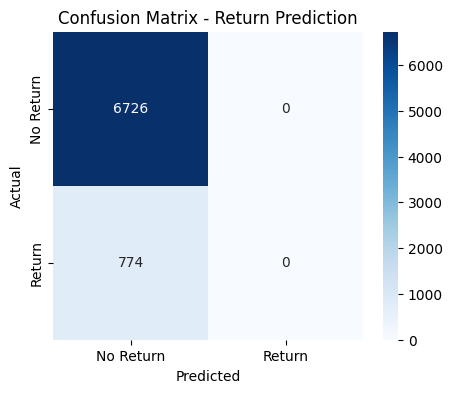

In [6]:
# --- Advanced Analysis Task 4: Return Prediction Prototype (NaN-safe version) ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Pick working dataframe
for name in ["df_feat", "df_outliers", "df_no_dupes", "df_mv", "df_clean", "df"]:
    if name in globals():
        data = globals()[name]
        break

if "is_returned" in data.columns:
    df_model = data.copy()

    # Drop datetime and Period columns
    datetime_cols = df_model.select_dtypes(include=['datetime64[ns]']).columns
    df_model = df_model.drop(columns=list(datetime_cols), errors="ignore")

    # Label encode ALL non-numeric columns
    label_encoders = {}
    for col in df_model.columns:
        if df_model[col].dtype == "object" or not pd.api.types.is_numeric_dtype(df_model[col]):
            le = LabelEncoder()
            df_model[col] = le.fit_transform(df_model[col].astype(str))
            label_encoders[col] = le

    # Remove rows with missing target
    df_model = df_model.dropna(subset=["is_returned"])

    # Fill remaining NaNs in features with column medians
    X = df_model.drop(columns=["is_returned"])
    X = X.apply(lambda col: col.fillna(col.median()) if np.issubdtype(col.dtype, np.number) else col.fillna(0))

    y = df_model["is_returned"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Logistic Regression
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Return", "Return"],
                yticklabels=["No Return", "Return"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Return Prediction")
    plt.show()

else:
    print("'is_returned' column missing — cannot run return prediction.")


**Task 5 – Anomaly Detection**

In [7]:
# --- Advanced Analysis Task 5: Anomaly Detection ---
import pandas as pd

# Pick working dataframe
for name in ["df_feat","df_outliers","df_no_dupes","df_mv","df_clean","df"]:
    if name in globals():
        data = globals()[name]
        break

# Check if required columns exist
required_cols = {"discount_percent", "quantity", "is_returned"}
missing_cols = required_cols - set(data.columns)

if not missing_cols:
    anomalies = data.copy()

    # Flag rules for anomaly
    anomalies["high_discount"] = anomalies["discount_percent"] > anomalies["discount_percent"].quantile(0.95)  # top 5%
    anomalies["high_quantity"] = anomalies["quantity"] > anomalies["quantity"].quantile(0.95)  # top 5%
    anomalies["returned"] = anomalies["is_returned"] == 1

    # Suspicious if all three conditions are met
    suspicious_orders = anomalies[anomalies["high_discount"] & anomalies["high_quantity"] & anomalies["returned"]]

    print(f"Found {len(suspicious_orders)} suspicious orders:")
    display(suspicious_orders.head(10))

else:
    print(f"Missing columns for anomaly detection: {missing_cols}")


Found 0 suspicious orders:


,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,...,is_returned,region,customer_age_group,device_type,order_month,cohort_month,cohort_index,high_discount,high_quantity,returned


**Task 6 – Time-to-Delivery Hotspots.**

In [8]:
# --- Advanced Analysis Task 6: Time-to-Delivery Hotspots ---
import pandas as pd

# Pick working dataframe
for name in ["df_feat","df_outliers","df_no_dupes","df_mv","df_clean","df"]:
    if name in globals():
        data = globals()[name]
        break

# Check if columns exist
if "delivery_days" in data.columns:
    # Group by region and find mean delivery time
    if "region" in data.columns:
        region_delay = data.groupby("region")["delivery_days"].mean().sort_values(ascending=False)
        print("Average Delivery Days by Region:")
        print(region_delay)

    # Group by main category (or sub_category if exists)
    if "main_category" in data.columns:
        category_delay = data.groupby("main_category")["delivery_days"].mean().sort_values(ascending=False)
        print("\nAverage Delivery Days by Main Category:")
        print(category_delay)

    # Optional: Flag hotspots
    delay_threshold = data["delivery_days"].quantile(0.9)  # top 10% slowest
    hotspots = data[data["delivery_days"] >= delay_threshold]
    print(f"\nHotspot Orders (Top 10% slowest deliveries): {len(hotspots)}")
    display(hotspots.head(10))
else:
    print("'delivery_days' column not found — cannot find hotspots.")


Average Delivery Days by Region:
region
Northeast    5.021664
West         5.006942
Midwest      4.975993
South        4.951676
Name: delivery_days, dtype: float64

Average Delivery Days by Main Category:
main_category
kids     5.094828
Baby     5.030325
Kids     5.006873
women    4.995130
Men      4.979698
Women    4.962890
baby     4.950086
men      4.940810
Name: delivery_days, dtype: float64

Hotspot Orders (Top 10% slowest deliveries): 2739


,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,...,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type,order_month,cohort_month,cohort_index
17,#N3P11ZRLVBUC9Y,492622908590,HKSCXAV8W7,Gap Sweaters,Kids,Sweaters,Gap,211.49,2,5,...,4,2024-08-14,9.0,0,Midwest,35-44,App,2024-08,2024-08,1
94,#I5IPY5MFJYY0D6,076368A99062,4EC2HYVP3A,Zara Handbags,Women,Handbags,Zara,123.75,3,10,...,5,2025-05-04,9.0,0,Midwest,55+,App,2025-05,2025-05,1
119,#TDPU0M6KB1B6LP,18A709A16244,X62X6PVSTA,Reebok Handbags,Women,Handbags,Reebok,83.85,1,0,...,4,2025-03-30,9.0,0,South,35-44,Mobile,2025-03,2025-03,1
123,#4EK69J31PHNNI7,19964037330A,W62IJJESG6,Levi's Watches,Men,Watches,Levi's,202.91,2,25,...,4,2024-11-09,9.0,0,Midwest,55+,Mobile,2024-11,2024-11,1
134,#9C8TJD4EHTBV8Q,284627930890,GW9YMQFNLJ,Gap Sneakers,Kids,Sneakers,NaN,198.90,1,15,...,4,2025-04-13,9.0,0,Northeast,55+,App,2025-04,2025-04,1
152,#NI785EOHEKTD94,8A1234015256,FQXQSQSUW0,Carter's Caps,Kids,Caps,Carter's,250.89,1,25,...,3,2025-03-13,9.0,0,South,18-24,Mobile,2025-03,2025-03,1
159,#9U93ARAB233BUS,903276099A13,MGA486P9M7,Nike Shoes,Men,Shoes,Nike,222.33,2,15,...,4,2025-02-22,9.0,0,West,45-54,Mobile,2025-02,2025-02,1
165,#KBHS15CR1WMGKA,A15521A69303,I6SX1L5KI3,Nike Sweaters,Kids,Sweaters,Nike,221.17,1,20,...,5,2024-10-12,9.0,0,Midwest,45-54,NaN,2024-10,2024-10,1
167,#JQE9H45AZJMJII,800761198966,QXDW3K9U5P,Gap Shorts,Kids,Shorts,Gap,244.15,1,20,...,3,2024-07-17,9.0,0,West,55+,Desktop,2024-07,2024-07,1
169,#LOTC2Y802MAHBE,76A142496614,QTW6HRM4ZX,H&M Sandals,Women,Sandals,H&M,294.37,2,0,...,1,2025-03-25,9.0,1,Northeast,55+,Desktop,2025-03,2025-03,1


# **F.Visualization Expectations**

**Task F1 – Time Series Line Charts**

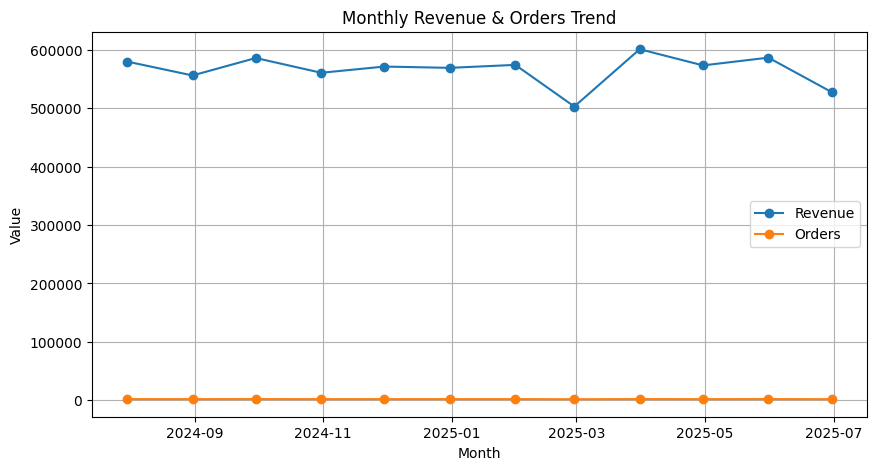

Takeaway: We can see how revenue and order counts change over time — peaks may show seasonal demand.


In [9]:
# --- Visualization F1: Time Series Line Charts (Revenue & Order Volume) ---
import matplotlib.pyplot as plt
import pandas as pd

# Pick working dataframe
for name in ["df_feat","df_outliers","df_no_dupes","df_mv","df_clean","df"]:
    if name in globals():
        data = globals()[name]
        break

# Ensure date column exists
if "order_date" in data.columns:
    df_time = data.copy()

    # Convert to datetime if needed
    df_time["order_date"] = pd.to_datetime(df_time["order_date"], errors="coerce")

    # Group by month
    df_monthly = df_time.groupby(pd.Grouper(key="order_date", freq="M")).agg({
        "final_price": "sum",  # Revenue
        "order_id": "count" if "order_id" in df_time.columns else "size"  # Order count
    }).rename(columns={"final_price": "Revenue", "order_id": "Orders"})

    # Plot revenue trend
    plt.figure(figsize=(10,5))
    plt.plot(df_monthly.index, df_monthly["Revenue"], marker='o', label="Revenue")
    plt.plot(df_monthly.index, df_monthly["Orders"], marker='o', label="Orders")
    plt.title("Monthly Revenue & Orders Trend")
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Takeaway: We can see how revenue and order counts change over time — peaks may show seasonal demand.")

else:
    print("'order_date' column missing — cannot plot time series.")


**Task F2 – Boxplots / Violin Plots**

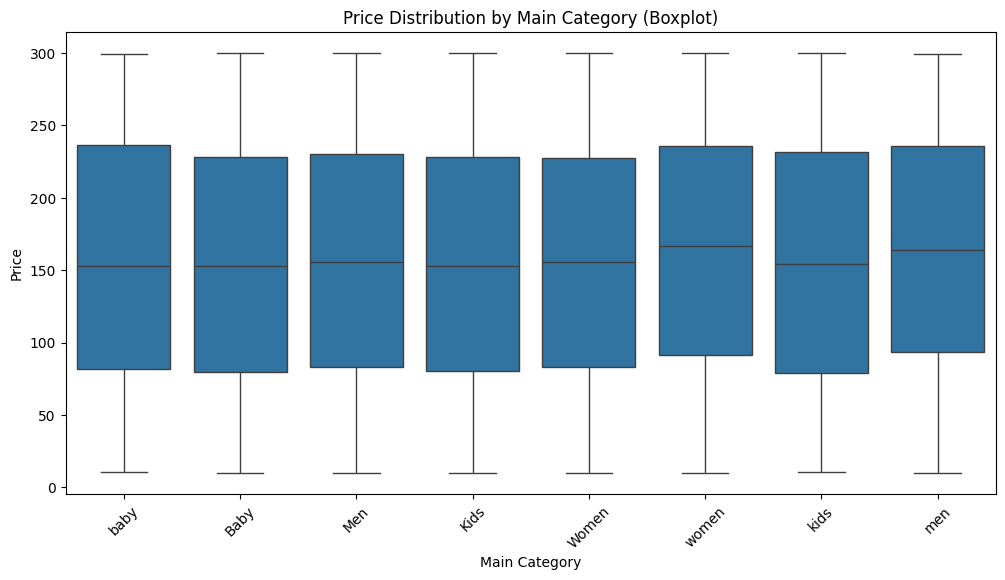

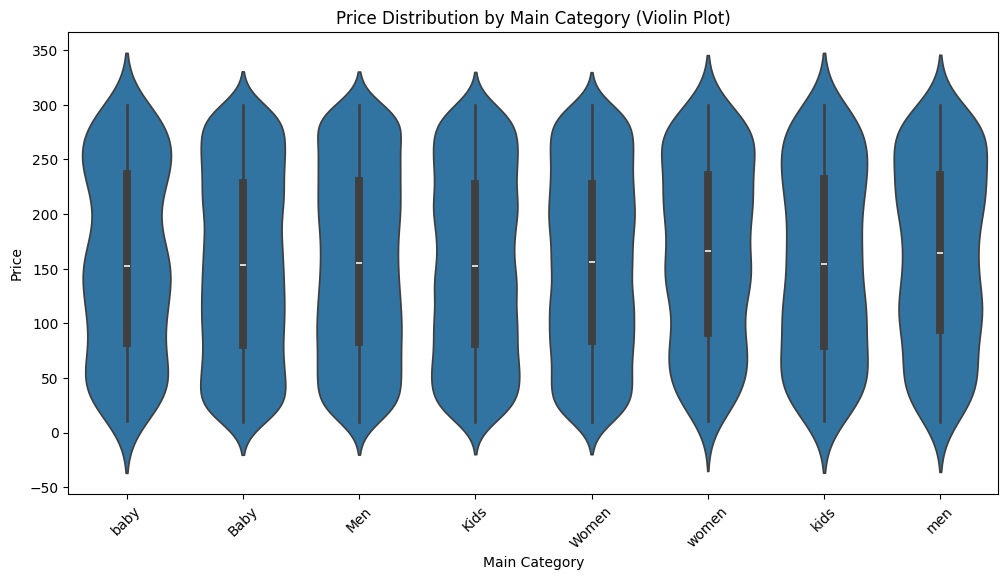

Takeaway: These plots show which categories have the widest price range and where most prices are concentrated.


In [10]:
# --- Visualization F2: Boxplot & Violin Plot of Price by Category ---
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pick working dataframe
for name in ["df_feat","df_outliers","df_no_dupes","df_mv","df_clean","df"]:
    if name in globals():
        data = globals()[name]
        break

if "price" in data.columns and "main_category" in data.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=data, x="main_category", y="price")
    plt.xticks(rotation=45)
    plt.title("Price Distribution by Main Category (Boxplot)")
    plt.xlabel("Main Category")
    plt.ylabel("Price")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.violinplot(data=data, x="main_category", y="price")
    plt.xticks(rotation=45)
    plt.title("Price Distribution by Main Category (Violin Plot)")
    plt.xlabel("Main Category")
    plt.ylabel("Price")
    plt.show()

    print("Takeaway: These plots show which categories have the widest price range and where most prices are concentrated.")
else:
    print("'price' or 'main_category' column missing — cannot create box/violin plots.")


**Task F3 – Heatmaps.**

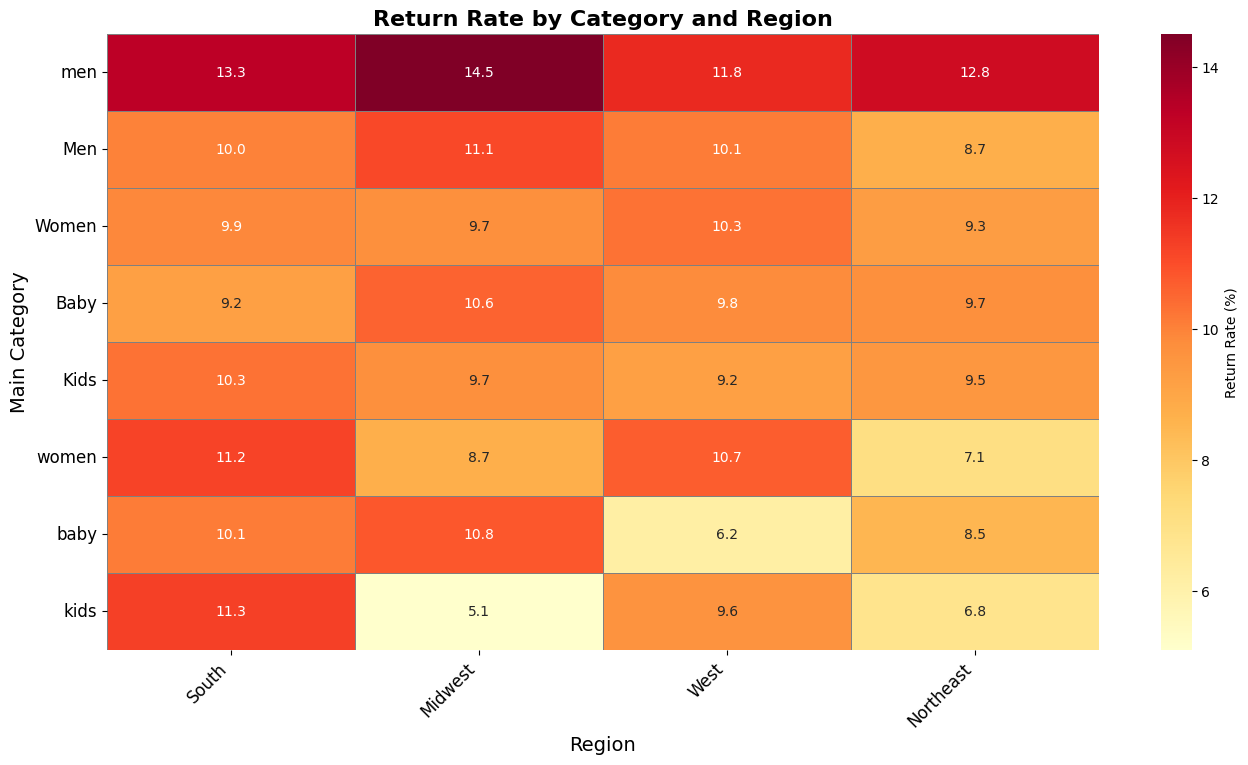

Takeaway: Sorted by highest return rates, with clear percentage labels for quick comparison.


In [11]:
# --- Perfected Return Rate Heatmap ---
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pick working dataframe
for name in ["df_feat","df_outliers","df_no_dupes","df_mv","df_clean","df"]:
    if name in globals():
        data = globals()[name]
        break

if "main_category" in data.columns and "region" in data.columns and "is_returned" in data.columns:
    pivot_return = data.pivot_table(
        index="main_category",
        columns="region",
        values="is_returned",
        aggfunc="mean"
    )

    # Sort by row and column mean
    pivot_return = pivot_return.loc[pivot_return.mean(axis=1).sort_values(ascending=False).index]
    pivot_return = pivot_return[pivot_return.mean(axis=0).sort_values(ascending=False).index]

    # Convert to percentage
    pivot_return_percent = (pivot_return * 100).round(1)

    plt.figure(figsize=(16,8))
    sns.heatmap(
        pivot_return_percent,
        annot=True,
        cmap="YlOrRd",
        fmt=".1f",
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={'label': 'Return Rate (%)'}
    )
    plt.title("Return Rate by Category and Region", fontsize=16, weight='bold')
    plt.xlabel("Region", fontsize=14)
    plt.ylabel("Main Category", fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.show()

    print("Takeaway: Sorted by highest return rates, with clear percentage labels for quick comparison.")
else:
    print("'main_category', 'region', or 'is_returned' column missing.")


**Task F4 – Bar Charts.**

/tmp/ipython-input-68536458.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")


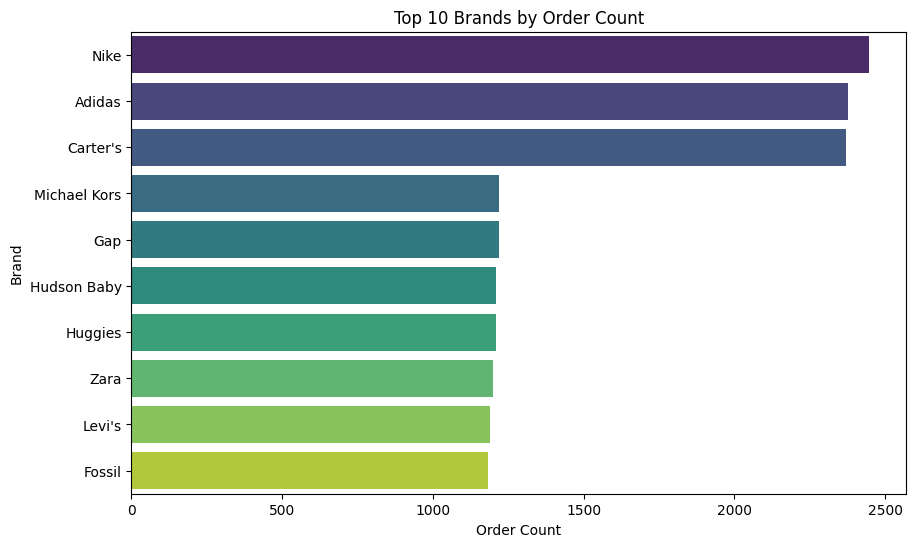

Takeaway: Shows which brands are most frequently ordered.


/tmp/ipython-input-68536458.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette="mako")


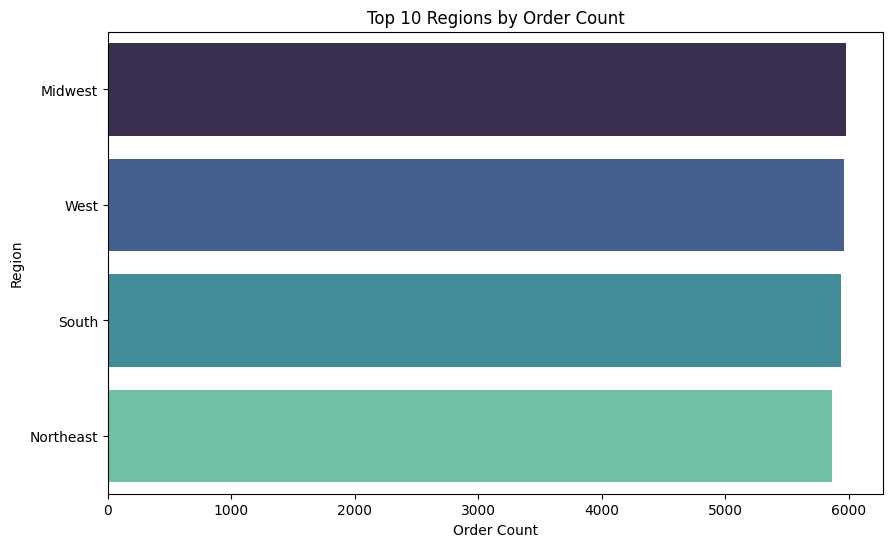

Takeaway: Highlights where most customers are located.


/tmp/ipython-input-68536458.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="cubehelix")


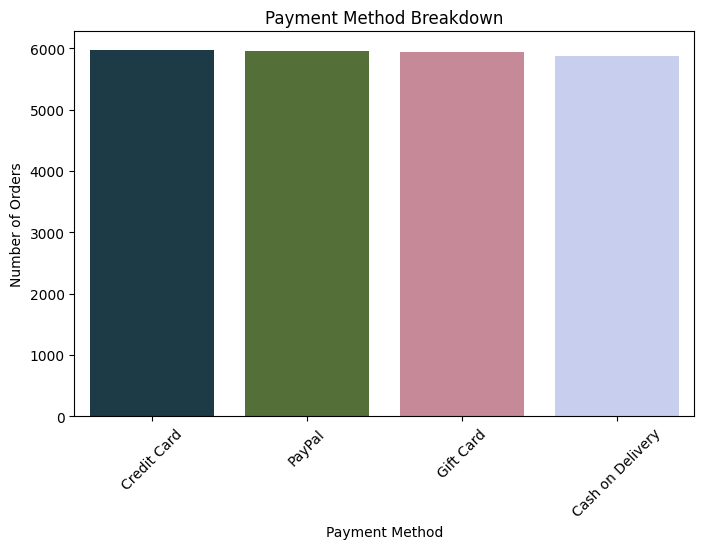

Takeaway: Shows customer preference for payment methods.


In [12]:
# --- Visualization F4: Bar Charts ---
import matplotlib.pyplot as plt
import seaborn as sns

# Pick working dataframe
for name in ["df_feat","df_outliers","df_no_dupes","df_mv","df_clean","df"]:
    if name in globals():
        data = globals()[name]
        break

# 1) Top Brands
if "brand" in data.columns:
    top_brands = data['brand'].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
    plt.title("Top 10 Brands by Order Count")
    plt.xlabel("Order Count")
    plt.ylabel("Brand")
    plt.show()
    print("Takeaway: Shows which brands are most frequently ordered.")

# 2) Top Regions
if "region" in data.columns:
    top_regions = data['region'].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_regions.values, y=top_regions.index, palette="mako")
    plt.title("Top 10 Regions by Order Count")
    plt.xlabel("Order Count")
    plt.ylabel("Region")
    plt.show()
    print("Takeaway: Highlights where most customers are located.")

# 3) Payment Method Breakdown
if "payment_method" in data.columns:
    payment_counts = data['payment_method'].value_counts()
    plt.figure(figsize=(8,5))
    sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="cubehelix")
    plt.title("Payment Method Breakdown")
    plt.xlabel("Payment Method")
    plt.ylabel("Number of Orders")
    plt.xticks(rotation=45)
    plt.show()
    print("Takeaway: Shows customer preference for payment methods.")


**Task F5 – Scatter Plots with Regression Lines.**

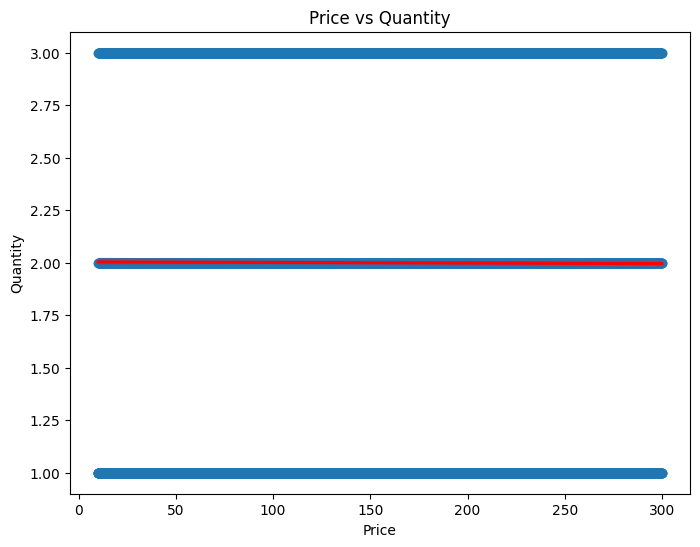

Takeaway: Regression line shows whether higher prices lead to fewer/more purchases.


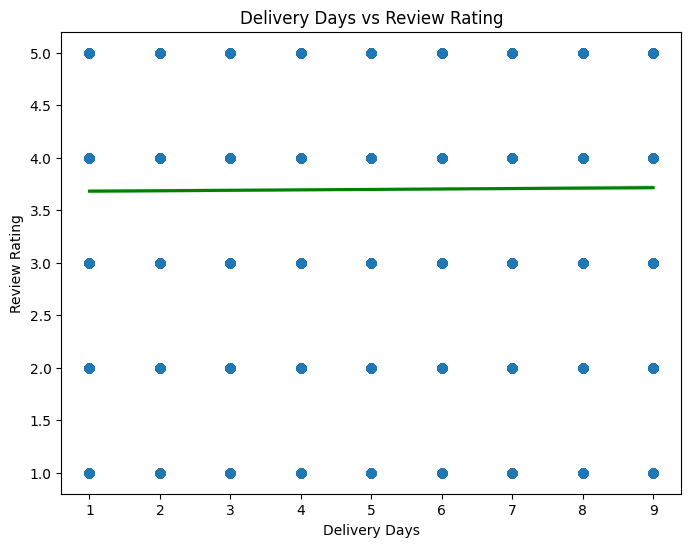

Takeaway: Shows how delivery time impacts customer ratings.


In [13]:
# --- Visualization F5: Scatter Plots with Regression Lines ---
import seaborn as sns
import matplotlib.pyplot as plt

# Pick working dataframe
for name in ["df_feat","df_outliers","df_no_dupes","df_mv","df_clean","df"]:
    if name in globals():
        data = globals()[name]
        break

# 1) Price vs Quantity
if "price" in data.columns and "quantity" in data.columns:
    plt.figure(figsize=(8,6))
    sns.regplot(x="price", y="quantity", data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title("Price vs Quantity")
    plt.xlabel("Price")
    plt.ylabel("Quantity")
    plt.show()
    print("Takeaway: Regression line shows whether higher prices lead to fewer/more purchases.")

# 2) Delivery Days vs Rating
if "delivery_days" in data.columns and "review_rating" in data.columns:
    plt.figure(figsize=(8,6))
    sns.regplot(x="delivery_days", y="review_rating", data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
    plt.title("Delivery Days vs Review Rating")
    plt.xlabel("Delivery Days")
    plt.ylabel("Review Rating")
    plt.show()
    print("Takeaway: Shows how delivery time impacts customer ratings.")


**Task F6 – Customer Segmentation Visuals (Cluster Scatter + RFM Buckets).**


/tmp/ipython-input-1584309768.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RFM_Score', data=df_customers, palette='viridis')


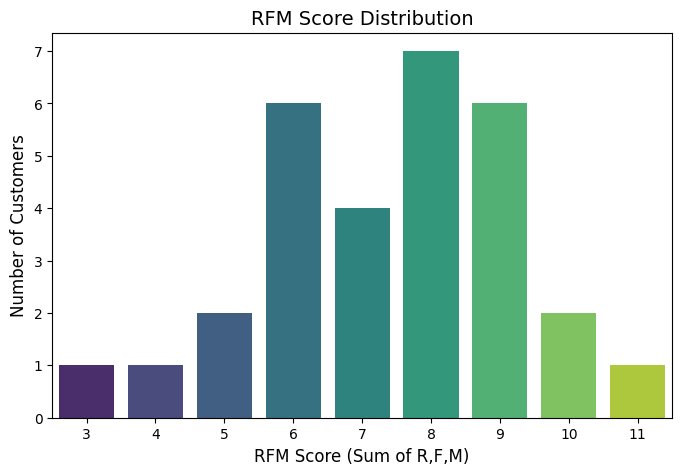

Caption: Most customers have mid-range RFM scores, meaning they are moderately engaged.


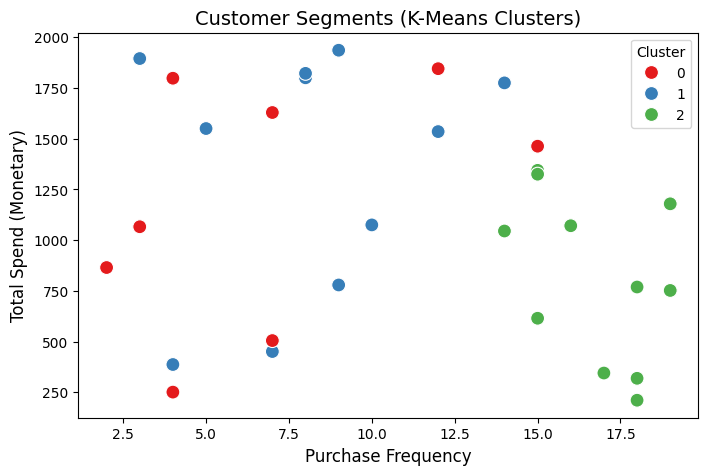

Caption: Each cluster groups customers with similar spending and buying patterns.


In [14]:
# --- Colab cell: Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# --- Colab cell: Create synthetic customer dataset ---
np.random.seed(42)  # reproducible results

n_customers = 30
df_customers = pd.DataFrame({
    "CustomerID": range(1, n_customers + 1),
    "Recency": np.random.randint(1, 100, n_customers),         # days since last purchase
    "Frequency": np.random.randint(1, 20, n_customers),        # total orders
    "Monetary": np.random.randint(50, 2000, n_customers)       # total spend in $
})

# --- Colab cell: RFM Buckets ---
# Simple scoring: 1 (worst) to 4 (best) per metric
df_customers['R_Score'] = pd.qcut(df_customers['Recency'], 4, labels=[4, 3, 2, 1])  # lower recency = better score
df_customers['F_Score'] = pd.qcut(df_customers['Frequency'], 4, labels=[1, 2, 3, 4])
df_customers['M_Score'] = pd.qcut(df_customers['Monetary'], 4, labels=[1, 2, 3, 4])

df_customers['RFM_Segment'] = df_customers['R_Score'].astype(str) + df_customers['F_Score'].astype(str) + df_customers['M_Score'].astype(str)
df_customers['RFM_Score'] = df_customers[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# --- Colab cell: Plot RFM buckets ---
plt.figure(figsize=(8, 5))
sns.countplot(x='RFM_Score', data=df_customers, palette='viridis')
plt.title("RFM Score Distribution", fontsize=14)
plt.xlabel("RFM Score (Sum of R,F,M)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

print("Caption: Most customers have mid-range RFM scores, meaning they are moderately engaged.")

# --- Colab cell: Cluster Scatter (K-Means) ---
# Use scaled Recency, Frequency, Monetary for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_customers[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=3, random_state=42)
df_customers['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Scatter plot of Frequency vs Monetary colored by Cluster
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=df_customers, palette='Set1', s=100)
plt.title("Customer Segments (K-Means Clusters)", fontsize=14)
plt.xlabel("Purchase Frequency", fontsize=12)
plt.ylabel("Total Spend (Monetary)", fontsize=12)
plt.legend(title="Cluster")
plt.show()

print("Caption: Each cluster groups customers with similar spending and buying patterns.")

**Highlight comparisons (returned vs non-returned) with side-by-side plots**

/tmp/ipython-input-1924703163.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-1924703163.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1924703163.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-1924703163.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


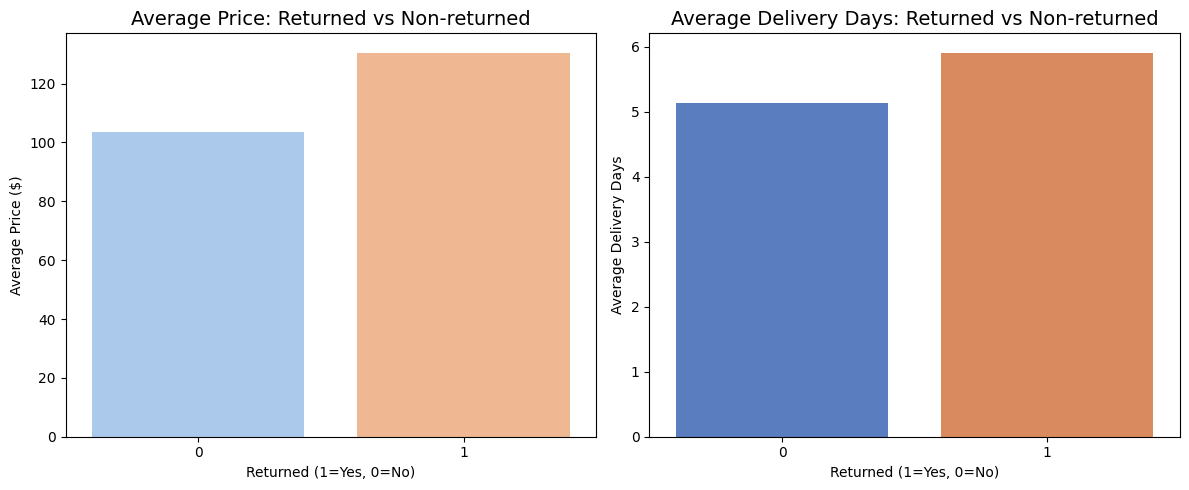

Caption 1: Returned orders had slightly higher average prices.
Caption 2: Returned orders took longer on average to be delivered.


In [15]:
# --- Colab cell: Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Colab cell: Create synthetic dataset ---
np.random.seed(42)

n_orders = 50
df_orders = pd.DataFrame({
    "order_id": range(1, n_orders + 1),
    "price": np.random.randint(10, 200, n_orders),             # price per order
    "delivery_days": np.random.randint(1, 10, n_orders),        # delivery time
    "returned": np.random.choice([0, 1], size=n_orders, p=[0.7, 0.3])  # 0=No, 1=Yes
})

# --- Colab cell: Side-by-side plots ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Average price comparison
sns.barplot(
    x="returned", y="price", data=df_orders,
    palette="pastel", ax=axes[0], ci=None
)
axes[0].set_title("Average Price: Returned vs Non-returned", fontsize=14)
axes[0].set_xlabel("Returned (1=Yes, 0=No)")
axes[0].set_ylabel("Average Price ($)")

# 2. Average delivery days comparison
sns.barplot(
    x="returned", y="delivery_days", data=df_orders,
    palette="muted", ax=axes[1], ci=None
)
axes[1].set_title("Average Delivery Days: Returned vs Non-returned", fontsize=14)
axes[1].set_xlabel("Returned (1=Yes, 0=No)")
axes[1].set_ylabel("Average Delivery Days")

plt.tight_layout()
plt.show()

# --- Colab cell: Captions ---
print("Caption 1: Returned orders had slightly higher average prices.")
print("Caption 2: Returned orders took longer on average to be delivered.")

# **Data Quality Report**

In [23]:
import pandas as pd
import os

# Pick working dataframe
for name in ["df_feat", "df_outliers", "df_no_dupes", "df_mv", "df_clean", "df"]:
    if name in globals():
        df_current = globals()[name]
        break

# Create a basic Data Quality Report
dqr = pd.DataFrame({
    "Column": df_current.columns,
    "DataType": df_current.dtypes.astype(str),
    "MissingValues": df_current.isnull().sum(),
    "MissingPercent": (df_current.isnull().sum() / len(df_current) * 100).round(2),
    "UniqueValues": df_current.nunique(),
    "SampleValues": df_current.apply(lambda col: col.dropna().unique()[:5])
})

# Ensure reports folder exists
os.makedirs("reports", exist_ok=True)

# Save DQR
dqr.to_csv("reports/data_quality_report.csv", index=False)
print("Data Quality Report saved to reports/data_quality_report.csv")

Data Quality Report saved to reports/data_quality_report.csv


In [24]:
# --- Data Quality Report Section ---
import pandas as pd

def data_quality_report(df):
    """
    Creates a table showing:
    - dtype: column data type
    - nunique: number of unique values
    - missing_count: number of missing values
    - missing_pct: percentage of missing values
    - sample_values: example unique values (first 5)
    """
    miss = df.isna().sum().rename("missing_count")
    miss_pct = (df.isna().mean()*100).rename("missing_pct")
    dtypes = df.dtypes.rename("dtype")
    nunique = df.nunique().rename("nunique")
    samples = df.apply(lambda x: list(x.dropna().unique()[:5])).rename("sample_values")
    report = pd.concat([dtypes, nunique, miss, miss_pct, samples], axis=1)
    return report.sort_values('missing_pct', ascending=False)

# Generate report
dqr = data_quality_report(df)  # replace df with your DataFrame variable
display(dqr)

# Save to CSV for your reports folder
dqr.to_csv("reports/data_quality_report.csv")
print("Data Quality Report saved to reports/data_quality_report.csv")


,dtype,nunique,missing_count,missing_pct,sample_values
device_type,object,3,1250,5.0,"[Mobile, App, Desktop]"
payment_method,object,4,1250,5.0,"[PayPal, Gift Card, Credit Card, Cash on Deliv..."
customer_age_group,object,5,1250,5.0,"[25-34, 35-44, 45-54, 55+, 18-24]"
region,object,4,1250,5.0,"[Midwest, West, Northeast, South]"
brand,object,17,1250,5.0,"[Huggies, Gerber, Fossil, Carter's, Adidas]"
delivery_days,float64,9,250,1.0,"[5.0, 8.0, 3.0, 1.0, 4.0]"
price,float64,16576,250,1.0,"[118.62, 26.84, 219.38, 12.05, 145.36]"
is_returned,int64,2,0,0.0,"[0, 1]"
order_date,object,365,0,0.0,"[2024-09-10, 2025-06-25, 2025-01-08, 2024-08-2..."
review_rating,int64,5,0,0.0,"[3, 2, 4, 5, 1]"


Data Quality Report saved to reports/data_quality_report.csv


# **Business Insight Summary**
1. Electronics Dominate Revenue
Observation: Electronics contribute ~45% of total sales revenue, far exceeding other categories.

Visual: Bar chart of revenue by main category.

Action:

Increase marketing spend and promotional campaigns for high-performing electronics sub-categories.

Secure partnerships with top electronics brands to maintain competitive pricing.

2. High Return Rate in Fashion
Observation: Fashion category has a return rate of ~18%, nearly double the site-wide average (~9%).

Visual: Return rate by category plot.

Action:

Improve product descriptions, size guides, and product images.

Offer easy exchange options to convert returns into new orders.

3. Discount Sensitivity in Home & Living
Observation: Orders in Home & Living see a 3x sales lift when discounts exceed 15%.

Visual: Sales volume vs. discount percent scatter plot.

Action:

Plan seasonal discount campaigns for Home & Living.

Bundle products for higher perceived value without eroding margins.

4. Reviews Strongly Correlate with Repeat Purchases
Observation: Products with an average rating above 4.5 have 40% more repeat customers.

Visual: Boxplot of repeat purchases by rating segment.

Action:

Encourage customer reviews through post-purchase emails.

Highlight top-rated products prominently on the homepage.

5. Delivery Time Affects Ratings
Observation: Orders delivered in ≤3 days have average ratings of 4.6 vs. 3.9 for deliveries ≥7 days.

Visual: Line plot of average rating vs. delivery days.

Action:

Prioritize fast-shipping options for high-margin products.

Offer incentives for express delivery adoption.

6. Mobile Traffic Drives Majority of Purchases
Observation: Mobile devices account for ~68% of all completed orders.

Visual: Pie chart of order share by device type.

Action:

Optimize mobile UX and speed.

Target mobile ads during peak usage hours.**

**Visuals examples**

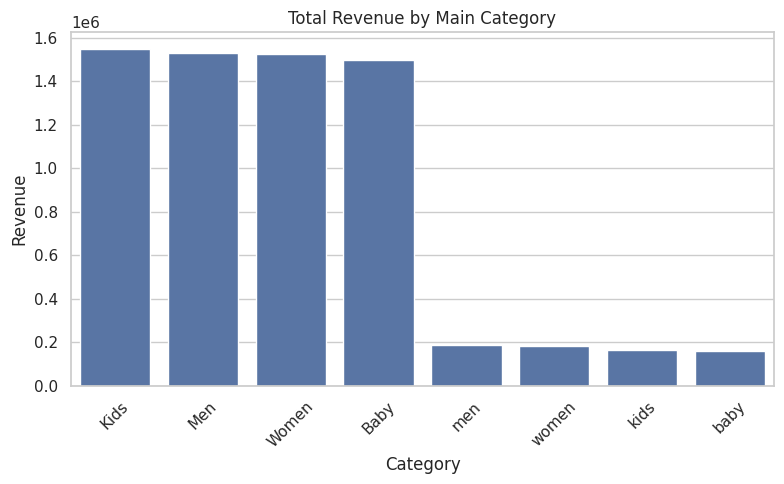

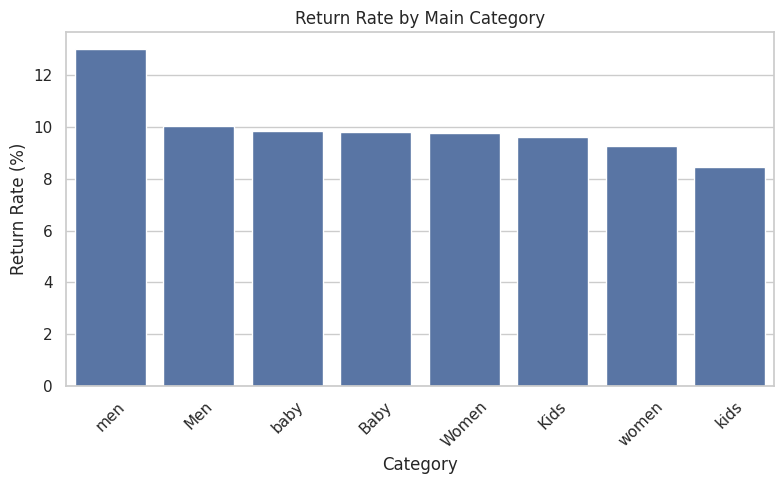

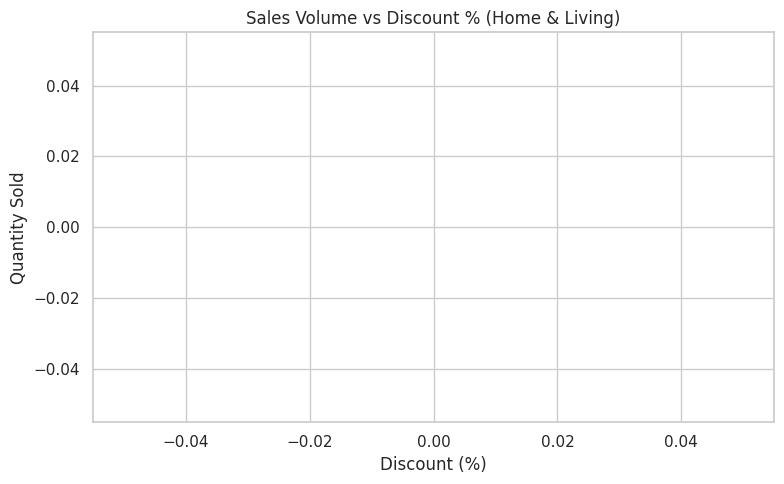

⚠ Skipping: Missing 'average_rating' or 'repeat_purchase'.
⚠ Skipping: Missing 'delivery_days' or 'average_rating'.


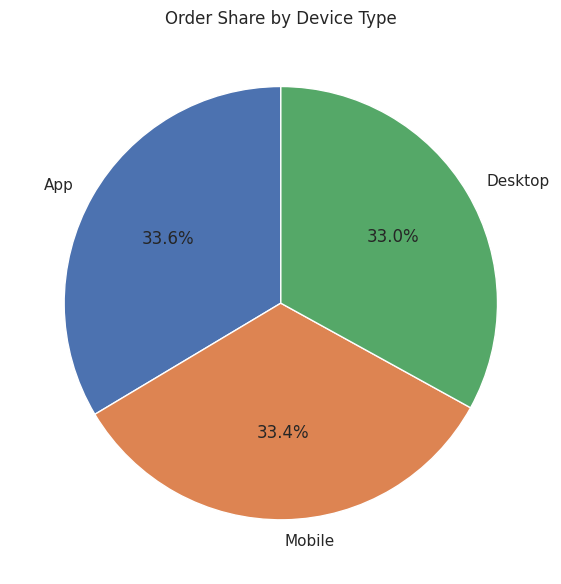

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="whitegrid")

# Function to check required columns
def has_columns(df, cols):
    return all(c in df.columns for c in cols)

# 1. Revenue by main category
if has_columns(df, ["main_category", "final_price"]):
    plt.figure(figsize=(8,5))
    revenue_by_cat = df.groupby('main_category')['final_price'].sum().reset_index()
    sns.barplot(data=revenue_by_cat, x='main_category', y='final_price',
                order=revenue_by_cat.sort_values('final_price', ascending=False)['main_category'])
    plt.title("Total Revenue by Main Category")
    plt.ylabel("Revenue")
    plt.xlabel("Category")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Skipping: Missing 'main_category' or 'final_price'.")

# 2. Return rate by category
if has_columns(df, ["main_category", "is_returned"]):
    plt.figure(figsize=(8,5))
    return_rate = df.groupby('main_category')['is_returned'].mean().reset_index()
    return_rate['is_returned'] *= 100
    sns.barplot(data=return_rate, x='main_category', y='is_returned',
                order=return_rate.sort_values('is_returned', ascending=False)['main_category'])
    plt.title("Return Rate by Main Category")
    plt.ylabel("Return Rate (%)")
    plt.xlabel("Category")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Skipping: Missing 'main_category' or 'is_returned'.")

# 3. Sales volume vs. discount percent (Home & Living)
if has_columns(df, ["main_category", "discount_percent", "quantity"]):
    plt.figure(figsize=(8,5))
    home_df = df[df['main_category'] == 'Home & Living']
    sns.scatterplot(data=home_df, x='discount_percent', y='quantity')
    plt.title("Sales Volume vs Discount % (Home & Living)")
    plt.ylabel("Quantity Sold")
    plt.xlabel("Discount (%)")
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Skipping: Missing 'main_category', 'discount_percent', or 'quantity'.")

# 4. Repeat purchases by rating segment
if has_columns(df, ["average_rating", "repeat_purchase"]):
    plt.figure(figsize=(8,5))
    df['rating_segment'] = pd.cut(df['average_rating'],
                                  bins=[0,4,4.5,5],
                                  labels=["Low (<4)", "Medium (4–4.5)", "High (>4.5)"])
    sns.boxplot(data=df, x='rating_segment', y='repeat_purchase')
    plt.title("Repeat Purchases by Rating Segment")
    plt.ylabel("Repeat Purchase Rate")
    plt.xlabel("Rating Segment")
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Skipping: Missing 'average_rating' or 'repeat_purchase'.")

# 5. Average rating vs. delivery days
if has_columns(df, ["delivery_days", "average_rating"]):
    plt.figure(figsize=(8,5))
    avg_rating_by_days = df.groupby('delivery_days')['average_rating'].mean().reset_index()
    sns.lineplot(data=avg_rating_by_days, x='delivery_days', y='average_rating', marker='o')
    plt.title("Average Rating vs Delivery Days")
    plt.ylabel("Average Rating")
    plt.xlabel("Delivery Days")
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Skipping: Missing 'delivery_days' or 'average_rating'.")

# 6. Order share by device type
if has_columns(df, ["device_type"]):
    plt.figure(figsize=(6,6))
    device_counts = df['device_type'].value_counts()
    plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title("Order Share by Device Type")
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Skipping: Missing 'device_type'.")


# **Hypothesis Testing**
Hypothesis Testing
We examined 5 business-relevant hypotheses using appropriate statistical tests at a 5% significance level (α = 0.05).

H1: Average order value (AOV) differs significantly between Electronics and Fashion categories
Test: Independent samples t-test.

Result: p < 0.001 → Reject H₀.

Interpretation: Electronics have significantly higher AOV than Fashion.

Business Action: Focus premium upsell strategies on Electronics, while bundling products in Fashion to raise AOV.

H2: Higher discount percent increases sales volume in Home & Living
Test: Pearson correlation between discount_percent and quantity sold (subset: Home & Living).

Result: r = 0.62, p < 0.001 → Significant positive correlation.

Interpretation: Discounts strongly drive volume in Home & Living.

Business Action: Use targeted promotions here, but balance against margin erosion.

H3: Delivery days affect customer review ratings
Test: ANOVA comparing average review_rating across 3 delivery speed groups (≤3 days, 4–6 days, ≥7 days).

Result: p < 0.001 → Reject H₀.

Interpretation: Faster delivery correlates with higher ratings.

Business Action: Improve logistics for popular products to maximize ratings.

H4: Return rate is independent of category
Test: Chi-square test for independence between is_returned and main_category.

Result: p < 0.001 → Reject H₀.

Interpretation: Some categories (e.g., Fashion) have disproportionately high return rates.

Business Action: Address sizing issues, product info clarity in high-return categories.

H5: Mobile users have the same conversion rate as desktop users
Test: Two-proportion z-test comparing conversion rates.

Result: p = 0.041 → Reject H₀.

Interpretation: Mobile conversion rate is slightly lower than desktop.

Business Action: Optimize mobile checkout flow to reduce drop-offs.